# Interactive Exploration of Figures 1-10: FQSD Analysis



# Overview of the Notebook

This Jupyter notebook contains the code used to generate the main images and visualizations presented in our article. The purpose of this notebook is to provide a transparent and detailed view of the methodologies and analytical processes we employed to derive the insights and results featured in our study.

Each segment of the code corresponds to specific figures (Figures 1-10) in the article, and we have included explanatory markdown cells to describe the purpose and functionality of these code segments. This approach ensures that the processes behind our data visualization and analysis are accessible and understandable, not only complementing the article but also allowing for reproducibility and further exploration by interested readers and researchers.

As we walk through the notebook, you'll find that each code block is accompanied by a description of what it achieves and how it contributes to the findings and visual representations in the article.


#######################################################################################################

# **Exploration of the Fine-Grained Question Subjectivity Dataset (FQSD)**

This notebook provides a comprehensive exploration of the `Fine-Grained Question Subjectivity Dataset (FQSD)`in the smartphone domain. Designed to distinguish not only between subjective and objective questions, FQSD offers additional categorizations to foster advancements in Automatic Subjective Question Answering (ASQA) systems.


## **An Introduction to the Dataset**

FQSD presents a curated collection of 10,000 questions, each meticulously classified to delve into the multifaceted aspects of question subjectivity. The dataset is heralded for its remarkable granularity and detailed categorizations, offering researchers and practitioners alike a robust foundation for examining and constructing ASQA systems.

### Main Classification Task

The FQSD segments questions into 10 unique classes, each tailored to offer insights into different dimensions of Fine-grained Subjectivity classification:

- **[TSS]:** Target Single Subjective
- **[TCS]:** Target Comparative Subjective
- **[ASS]:** Attitude Single Subjective
- **[ACS]:** Attitude Comparative Subjective
- **[RSS]:** Reason Single Subjective
- **[RCS]:** Reason Comparative Subjective
- **[YSS]:** Yes/No Single Subjective
- **[YCS]:** Yes/No Comparative Subjective
- **[NSO]:** None Single Objective
- **[NCO]:** None Comparative Objective

Each class serves as a lens through which the nuances of question subjectivity can be further discerned and analyzed, offering a structured framework for both exploration and model training within the domain.

## Diving Deeper: Exploring Subtasks

### 1. Subjectivity Classification

Under this subtask, the focus is pinned on bifurcating questions into generalized types such as:
- **[S]:** Subjective, where the question implies subjectivity or opinion.
- **[O]:** Objective, where the question seeks factual and verifiable information.

### 2. Comparison-form Classification

This classification subtask differentiates between distinct forms of questions:
- **[C]:** Comparative, implying a comparison between products.
- **[S]:** Single, implying no comparative analysis.

### 3. Subjective-types Classification

This level delves into the specific type of subjectivity found in questions, categorized as:
- **[T]:** Target,Inquiring about the entity subject to public perception.
- **[A]:** Attitude, Seeking the rationale behind prevailing public views about a particular entity.
- **[R]:** Reason, Querying public sentiment regarding a specific entity.
- **[Y]:** Yes/No, Probing to confirm the accuracy of a statement related to a particular entity.
- **[N]:** None

### 4. Subjectiveity_ComparisionForm Classification

This subtask meticulously categorizes subjective questions into further distinct types, such as:
- **[CS]:** Comparative Subjective
- **[CO]:** Comparative Objective
- **[SS]:** Single Subjective
- **[SO]:** Single Objective

FQSD, through its detailed categorization and well-defined structure, aims to be a pivotal tool for researchers and engineers in developing, validating, and optimizing ASQA systems, thus paving the way for more accurate and reliable subjectivity analysis in automated question answering.


## **Dataset Instructions**

1. Download the dataset from [this link](https://github.com/mahsamb/FSQD/blob/main/FSQD-Json-dataset.zip).
2. Unzip the downloaded file to access the datasets.


#######################################################################################################

# Data Retrieval and Preparation

In this section of the notebook, we focus on the initial step of our data analysis process – retrieving and preparing the dataset. We use the `requests` library to download the dataset from a provided URL, and then unzip the files for further analysis.

The dataset, hosted on GitHub, is in a zipped JSON format. The code below handles the download process, checks for successful download, and then unzips the contents to a specified directory. This process ensures that we are working with the most up-to-date version of our dataset and that it is readily accessible for the subsequent stages of our analysis.


In [1]:
import requests
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_url = "https://github.com/mahsamb/FSQD/raw/main/FSQD-Json-dataset.zip"
zip_filename = "FSQD-Json-dataset.zip"

# Downloading using requests
response = requests.get(data_url)

# Check if the request was successful (status_code 200)
if response.status_code == 200:
    with open(zip_filename, "wb") as f:
        f.write(response.content)
else:
    print(f"Failed to retrieve the data: {response.status_code}: {response.text}")
    # Add additional error handling here

# Unzipping the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("FSQD-Json-dataset")
    print("Files extracted:")
    print(os.listdir("FSQD-Json-dataset"))
except zipfile.BadZipFile:
    print("Error: The file doesn’t appear to be a valid zip file")



json_file_path = 'FSQD-Json-dataset/FSQD-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")



Files extracted:
['FSQD-Json-dataset.json', 'SubjQA-Json-dataset.json', 'Yu_et_al_2012-Json-dataset.json', 'ConvEx-Json-dataset.json']


In [2]:
print(merged_df.columns)

Index(['Question', 'Label_FSQD', 'Label_Subjectivity', 'Label_ComparisionForm',
       'Label_Subjectivity_ComparisionForm', 'Label_SubjectivityType'],
      dtype='object')


#######################################################################################################

# **Visualization of FSQD (Fine-grained Question Subjectivity Dataset)**

# Data Loading and Initial Visualization

This part of the notebook deals with loading our dataset and conducting an initial exploration of its contents. We use the `pandas` library to read the dataset from a JSON file and then perform a preliminary analysis to understand its structure and the distribution of labels.

First, the dataset is loaded into a DataFrame. We then display a random sample of the data to get a sense of its format and the type of information it contains. This step is crucial for verifying the data's integrity and layout.

After the initial inspection, we proceed to visualize the distribution of each label within the dataset. We use `matplotlib` and `seaborn` libraries to create a series of plots, each representing the frequency distribution of a different label in the dataset. These visualizations are instrumental in providing insights into the balance or imbalance of categories and guiding subsequent data processing steps, such as balancing the dataset if needed.


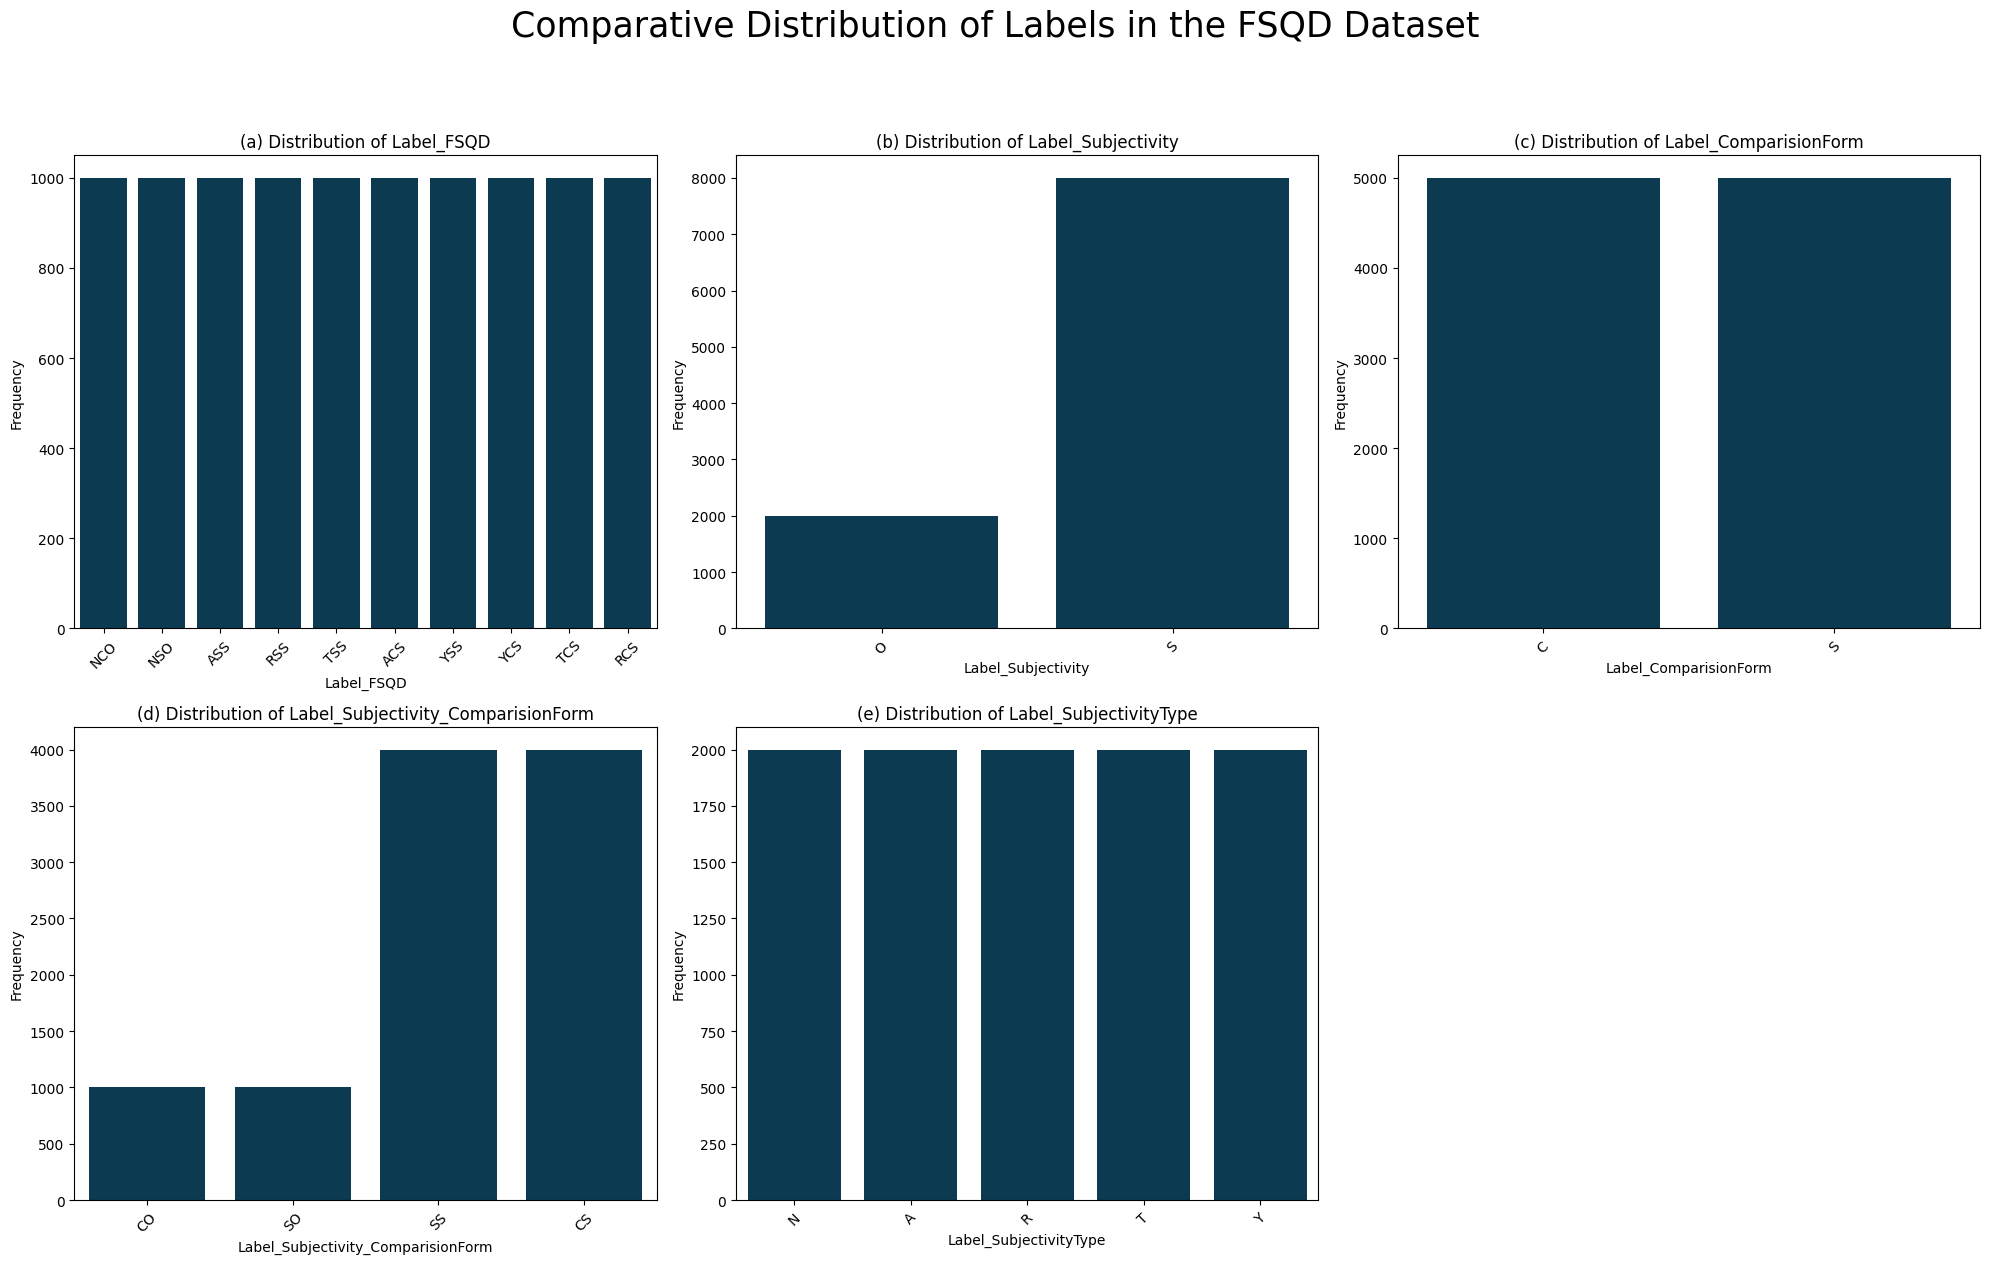

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

json_file_path = 'FSQD-Json-dataset/FSQD-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")

# Displaying random examples from the dataset
sample_data = merged_df.sample(5)

# Visualizing the distribution of each label separately
plt.figure(figsize=(20, 12))

# Extracting label columns
label_columns = merged_df.columns[1:]  # Assuming first column is 'Question' and rest are labels
subcaptions = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Dark blue color
dark_blue = '#003f5c'  # You can adjust the shade as needed

# Plotting distribution for each label with a uniform color
for i, label in enumerate(label_columns, 1):
    plt.subplot(2, 3, i)  # Adjust grid dimensions (2, 3) based on the number of label columns
    sns.countplot(x=label, data=merged_df, color=dark_blue)  # Using dark blue for all bars
    plt.title(f"{subcaptions[i-1]} Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

# Overall caption for the figure
plt.suptitle('Comparative Distribution of Labels in the FSQD Dataset', fontsize=25, y=1.05)

plt.tight_layout()
plt.savefig('FSQD_distribution_of_labels.tif')  # Save the figure
plt.show()


## Sample Questions

Diving into random samples provides a qualitative touchpoint for the dataset.


In [4]:
# Displaying random examples from the dataset
sample_data = merged_df.sample(5)
print(sample_data)


                                               Question Label_FSQD  \
1697  Is the Redmi Note 10's display prone to flicke...        NSO   
1220  How do I insert an sd card on Samsung galaxy on7?        NSO   
8660  Among the Samsung Galaxy A72, Asus Zenfone 10,...        TCS   
448   Which phone has a higher wireless charging spe...        NCO   
2506  How efficient is its wireless charging technol...        ASS   

     Label_Subjectivity Label_ComparisionForm  \
1697                  O                     S   
1220                  O                     S   
8660                  S                     C   
448                   O                     C   
2506                  S                     S   

     Label_Subjectivity_ComparisionForm Label_SubjectivityType  
1697                                 SO                      N  
1220                                 SO                      N  
8660                                 CS                      T  
448                     

#######################################################################################################

# **Visulization of Yu, Zha, and Chua [1] dataset**

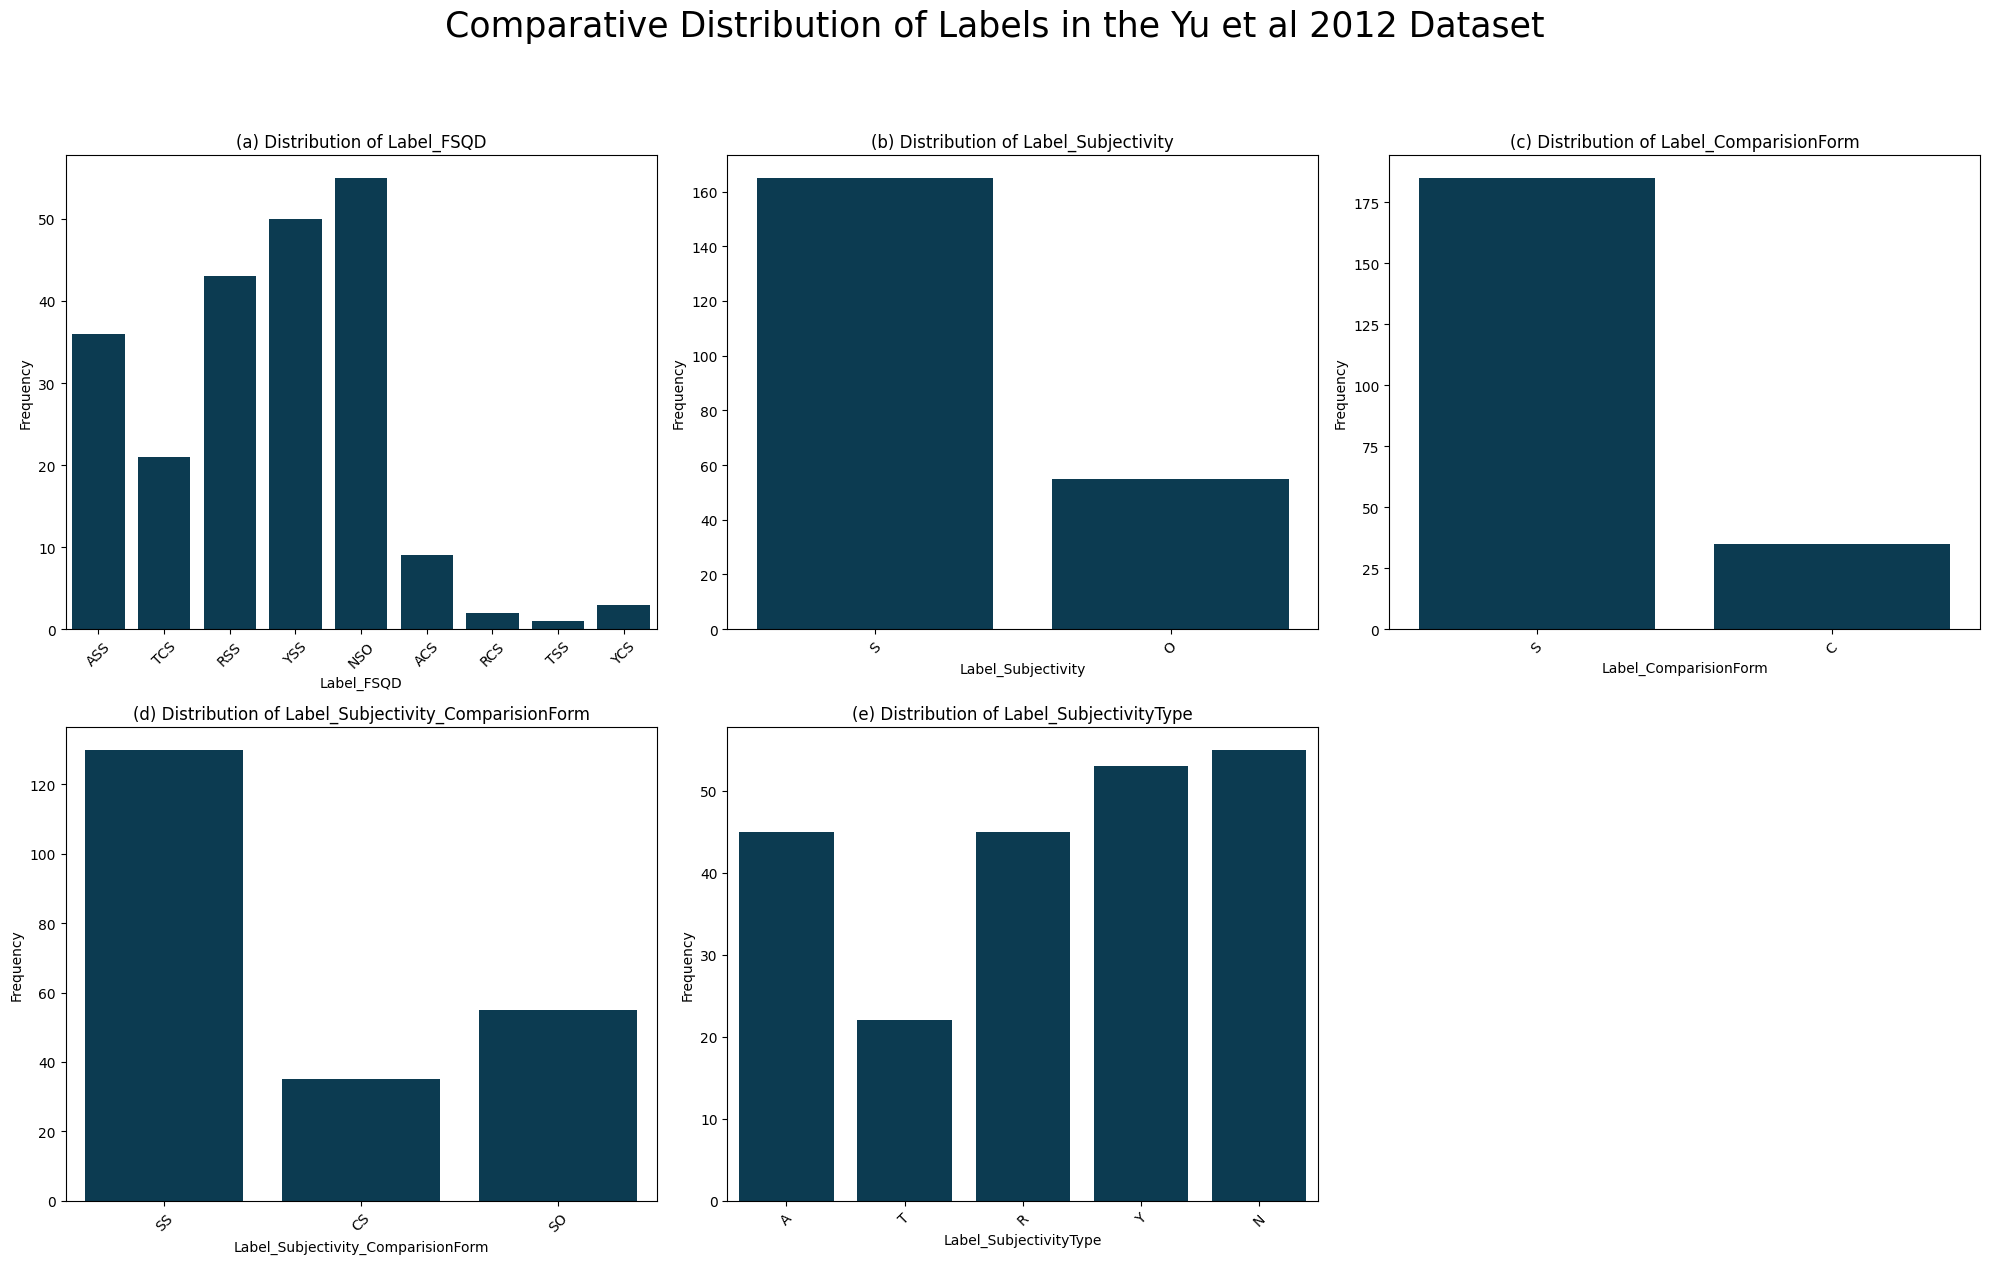

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

json_file_path = 'FSQD-Json-dataset/Yu_et_al_2012-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")

# Displaying random examples from the dataset
sample_data = merged_df.sample(5)

# Visualizing the distribution of each label separately
plt.figure(figsize=(20, 12))

# Extracting label columns
label_columns = merged_df.columns[1:]  # Assuming first column is 'Question' and rest are labels
subcaptions = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Dark blue color
dark_blue = '#003f5c'  # You can adjust the shade as needed

# Plotting distribution for each label with a uniform color
for i, label in enumerate(label_columns, 1):
    plt.subplot(2, 3, i)  # Adjust grid dimensions (2, 3) based on the number of label columns
    sns.countplot(x=label, data=merged_df, color=dark_blue)  # Using dark blue for all bars
    plt.title(f"{subcaptions[i-1]} Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

# Overall caption for the figure
plt.suptitle('Comparative Distribution of Labels in the Yu et al 2012 Dataset', fontsize=25, y=1.05)

plt.tight_layout()
plt.savefig('Yu_et_al_2012_distribution_of_labels.tif')  # Save the figure
plt.show()


#######################################################################################################

# **Visulization of ConvEx-DS [3] Dataset**


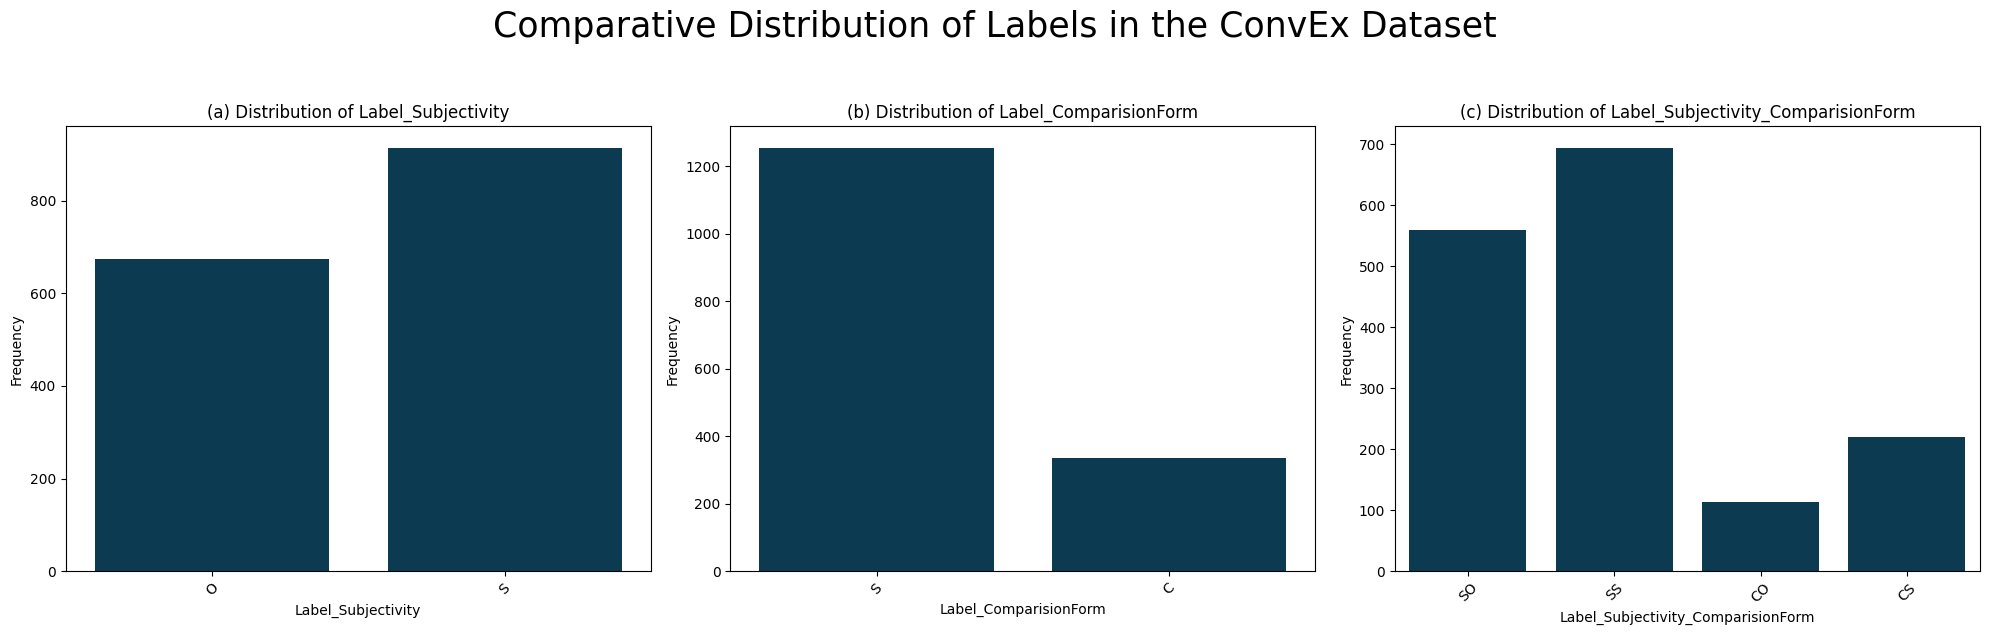

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

json_file_path = 'FSQD-Json-dataset/ConvEx-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")

# Displaying random examples from the dataset
sample_data = merged_df.sample(5)

# Visualizing the distribution of each label separately
plt.figure(figsize=(20, 6))

# Extracting label columns
label_columns = merged_df.columns[1:]  # Assuming first column is 'Question' and rest are labels
subcaptions = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Dark blue color
dark_blue = '#003f5c'  # Using dark blue for all bars

# Plotting distribution for each label with a uniform color
for i, label in enumerate(label_columns, 1):
    plt.subplot(1, 3, i)  # Adjust grid dimensions (2, 3) based on the number of label columns
    sns.countplot(x=label, data=merged_df, color=dark_blue)  # Applying dark blue color
    plt.title(f"{subcaptions[i-1]} Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

# Overall caption for the figure
plt.suptitle('Comparative Distribution of Labels in the ConvEx Dataset', fontsize=25, y=1.05)

plt.tight_layout()
plt.savefig('ConvEx_distribution_of_labels.tif')  # Save the figure
plt.show()


#######################################################################################################

# **Visualization of SubjQA [2] Dataset**

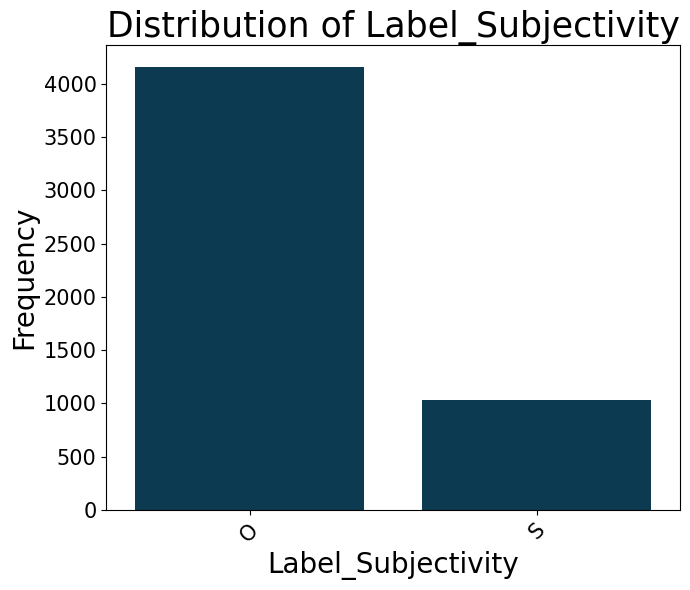

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

json_file_path = 'FSQD-Json-dataset/SubjQA-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")

# Dark blue color
dark_blue = '#003f5c'  # Using dark blue for all bars

# Assuming you want to visualize the distribution for the first label column as an example
label = merged_df.columns[1]  # Adjust this index if you want to visualize a different label

plt.figure(figsize=(7, 6))  # Adjusting figure size for a single plot
sns.countplot(x=label, data=merged_df, color=dark_blue)
plt.title(f"Distribution of {label}", fontsize=25)
plt.xlabel(label, fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('SubjQA_single_label_distribution.tif')  # Save the figure
plt.show()


#######################################################################################################

# Dataset Paths Configuration

This section of the notebook configures the paths to multiple datasets used in our analysis. Each dataset plays a crucial role and is chosen for its specific characteristics and relevance to our research focus on fine-grained question subjectivity in the smartphone domain.

- **FSQD**: The Fine-Grained Question Subjectivity Dataset (FSQD) forms the core of our analysis. It includes a diverse range of questions sourced from platforms like Quora and Amazon, tailored to the smartphone domain. The questions were meticulously refined and adapted to create a rich, nuanced dataset for subjectivity analysis&#8203;.

- **Yu et al. [1]**: This dataset contains 220 questions from the cellphone domain and serves as a foundational resource for comparison in our study. However, it mainly consists of single-sentence questions and may not fully represent complex real-world queries&#8203;``.

- **ConvEx-DS [3]**: A dataset focusing on user question intents in the hotel domain, consisting of 1589 questions. It covers subjectivity and comparison-form classifications but does not include subjective-type questions and is not specific to the smartphone domain&#8203;``.

- **SubjQA [2]**: Offering a broad range of subjective and objective questions across six domains, SubjQA is a useful comparative dataset. Despite its breadth, it does not include comparative or subjective-type questions and lacks a focus on the smartphone domain, which is central to our study&#8203;``.

The paths to these datasets are crucial for accessing and processing the data for our analyses, enabling us to draw comprehensive comparisons and insights.


In [8]:
# Paths to your dataset files
dataset_paths = {
    'FSQD': 'FSQD-Json-dataset/FSQD-Json-dataset.json',
    'ConvEx-DS': 'FSQD-Json-dataset/ConvEx-Json-dataset.json',
    'Yu et al., 2012': 'FSQD-Json-dataset/Yu_et_al_2012-Json-dataset.json',
    'SubjQA': 'FSQD-Json-dataset/SubjQA-Json-dataset.json'
}

#######################################################################################################

# Interactive Exploration of Figures 1-10: FQSD Analysis



### Loading FQSD:

In [9]:
import requests
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_url = "https://github.com/mahsamb/FSQD/raw/main/FSQD-Json-dataset.zip"
zip_filename = "FSQD-Json-dataset.zip"

# Downloading using requests
response = requests.get(data_url)

# Check if the request was successful (status_code 200)
if response.status_code == 200:
    with open(zip_filename, "wb") as f:
        f.write(response.content)
else:
    print(f"Failed to retrieve the data: {response.status_code}: {response.text}")
    # Add additional error handling here

# Unzipping the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("FSQD-Json-dataset")
    print("Files extracted:")
    print(os.listdir("FSQD-Json-dataset"))
except zipfile.BadZipFile:
    print("Error: The file doesn’t appear to be a valid zip file")



json_file_path = 'FSQD-Json-dataset/FSQD-Json-dataset.json'  # Update with the correct file path

# Try reading the file as a JSON Lines file
try:
    merged_df = pd.read_json(json_file_path, lines=True)
except ValueError as e:
    print(f"Error reading the JSON file: {e}")



Files extracted:
['FSQD-Json-dataset.json', 'SubjQA-Json-dataset.json', 'Yu_et_al_2012-Json-dataset.json', 'ConvEx-Json-dataset.json']


In [10]:
print(merged_df.columns)

Index(['Question', 'Label_FSQD', 'Label_Subjectivity', 'Label_ComparisionForm',
       'Label_Subjectivity_ComparisionForm', 'Label_SubjectivityType'],
      dtype='object')


#######################################################################################################

# A TF-IDF Exploration of Top Noun/Noun Phrases Terms in the FQSD Dataset

This figure illustrates the top 30 unigram, bigram, and trigram terms based on their TF-IDF scores within the FQSD. By focusing on significant nouns and noun phrases, it highlights the entities and attributes most prevalent in user questions, like 'Samsung Galaxy', 'iPhone', and 'Xiaomi', and key aspects such as 'camera', 'battery', and 'display'. This analysis not only aligns with previous findings but also underscores the specific features users are most concerned with, providing valuable insights into consumer priorities and interests.


**Fig 1: Top 30 TF-IDF Scores of Nouns and Noun Phrases in FQSD.**

In this code, we leverage the `spaCy` library for natural language processing (NLP) to preprocess our text data, removing stopwords and punctuation to focus on the meaningful content. The processed text is then analyzed using the `TfidfVectorizer` from `scikit-learn`, which computes the TF-IDF (Term Frequency-Inverse Document Frequency) scores for unigrams, bigrams, and trigrams. This method helps us identify the most significant terms within the FQSD by their weighted frequency, emphasizing their relevance in the dataset.

The code initiates by loading the `en_core_web_sm` model from `spaCy` for English language processing. It defines a function `process_text` to clean the text data. After applying this function to our dataset, we initialize and fit a `TfidfVectorizer` to transform our text data into a TF-IDF matrix, capturing the importance of terms. Following the transformation, we summarize and sort the TF-IDF scores to identify the most relevant terms.

Lastly, a visualization function `plot_top_tfidf_terms` is defined and called to plot the top 50 terms based on their aggregate TF-IDF scores. This visualization aims to highlight the key nouns and noun phrases that dominate the dataset, providing insights into the main topics and features users inquire about in smartphones. The plot is saved as a PNG file for further analysis and sharing.


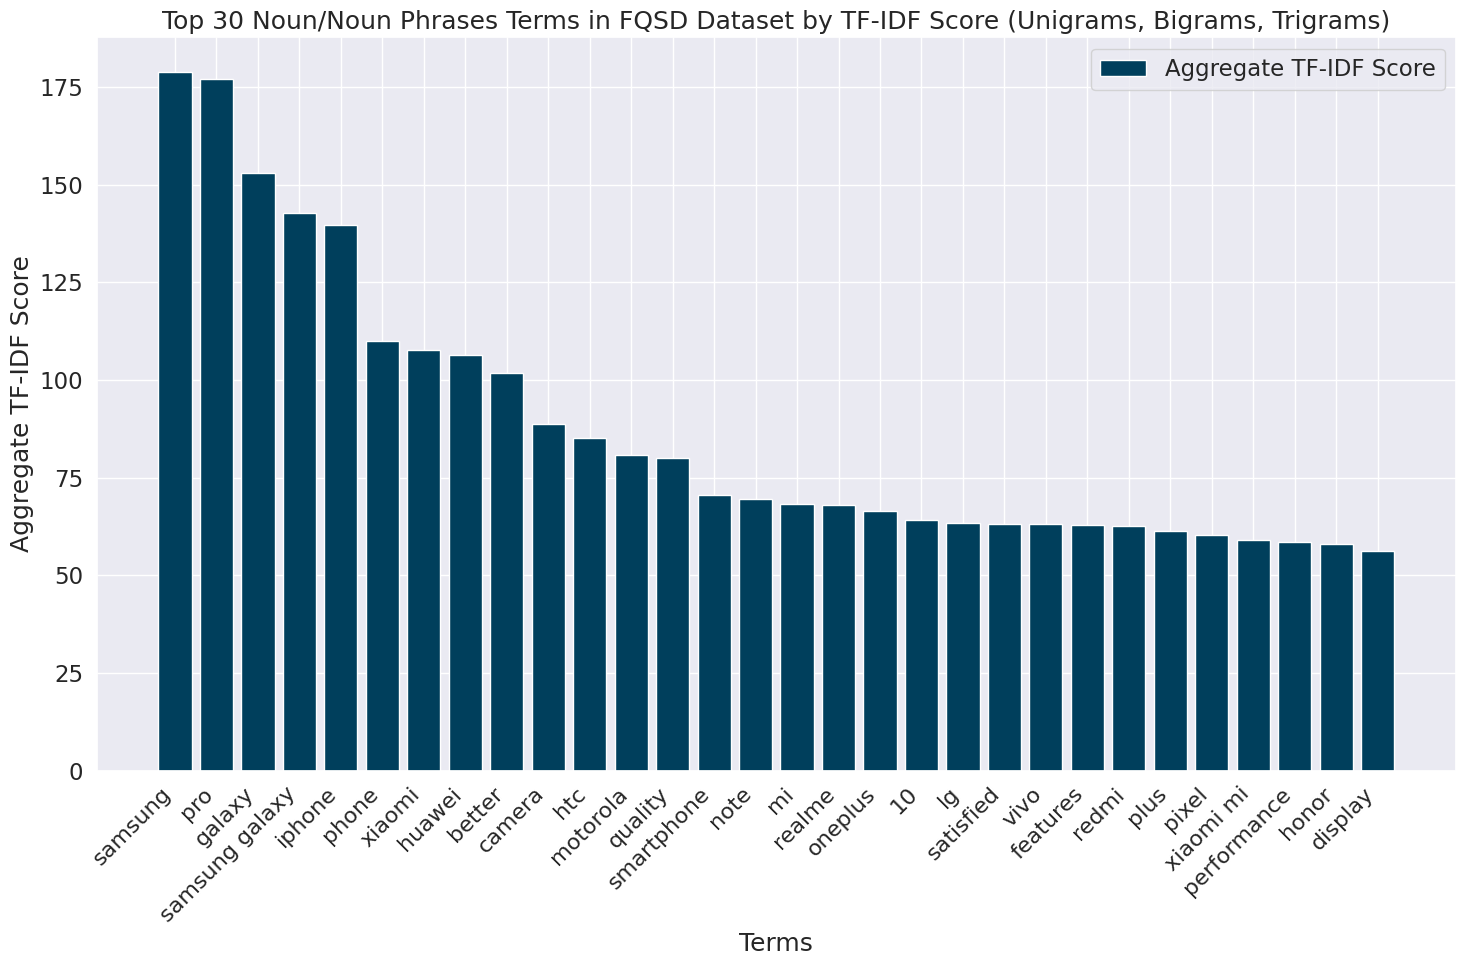

In [33]:

import spacy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spacy model for NLP
nlp = spacy.load("en_core_web_sm")

# Function to process text data
def process_text(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop and not token.is_punct])

# Apply the processing function to your text data
merged_df['processed_text'] = merged_df['Question'].apply(process_text)  # Replace 'Question' with your text column name

# Initialize the TF-IDF Vectorizer with unigrams, bigrams, and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Create TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(merged_df['processed_text'])

# Summarize and sort TF-IDF scores
summed_tfidf = tfidf_matrix.sum(axis=0)
tfidf_scores = [(word, summed_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Function to plot top TF-IDF terms with adjusted figure size and labels rotated for readability

def plot_top_tfidf_terms(sorted_scores, top_n=30):
    top_terms = sorted_scores[:top_n]
    terms, scores = zip(*top_terms)

    plt.figure(figsize=(15, 10))  # Adjusted for a larger and wider figure
    bars = plt.bar(range(len(top_terms)), scores, color='#003f5c', label='Aggregate TF-IDF Score')  # Added label here for the legend
    plt.xlabel('Terms', fontsize=18)
    plt.ylabel('Aggregate TF-IDF Score', fontsize=18)
    plt.title('Top 30 Noun/Noun Phrases Terms in FQSD Dataset by TF-IDF Score (Unigrams, Bigrams, Trigrams)', fontsize=18)
    plt.xticks(range(len(top_terms)), terms, rotation=45, ha="right", fontsize=16)
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.legend()  # This will add the legend to your plot
    plt.savefig("Top_TFIDF_Noun_Phrases_Terms_Unigrams_Bigrams_Trigrams_wide.tif")
    plt.show()

# Plot top TF-IDF terms
plot_top_tfidf_terms(sorted_tfidf_scores, 30)



#######################################################################################################

##A TF-IDF Analysis of Adjectives and Adverbs Across Subjectivity-ComparisionForm Classes

Understanding the nuances in textual data often requires a deep dive into the language used, particularly adjectives and adverbs, to discern between subjective and objective tones, as well as comparative contexts. To this end, our analysis in Fig 2 employs TF-IDF to scrutinize these parts of speech within four specifically defined classes: Comparative Objective (CO), Comparative Subjective (CS), Single Objective (SO), and Single Subjective (SS). This classification stems from recognizing an overlap in linguistic patterns across ten initial categories, which tended to blur the lines necessary for a detailed examination. By narrowing our focus to these four classes, we ensure a sharper analytical lens, preserving the distinctiveness of each category and offering a clear depiction of the underlying discourse.

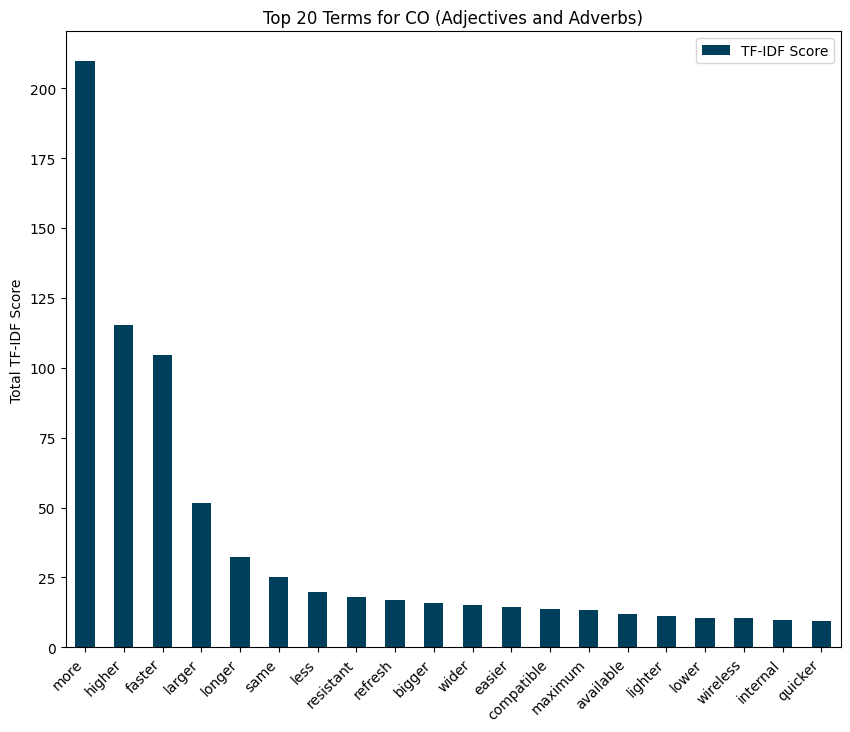

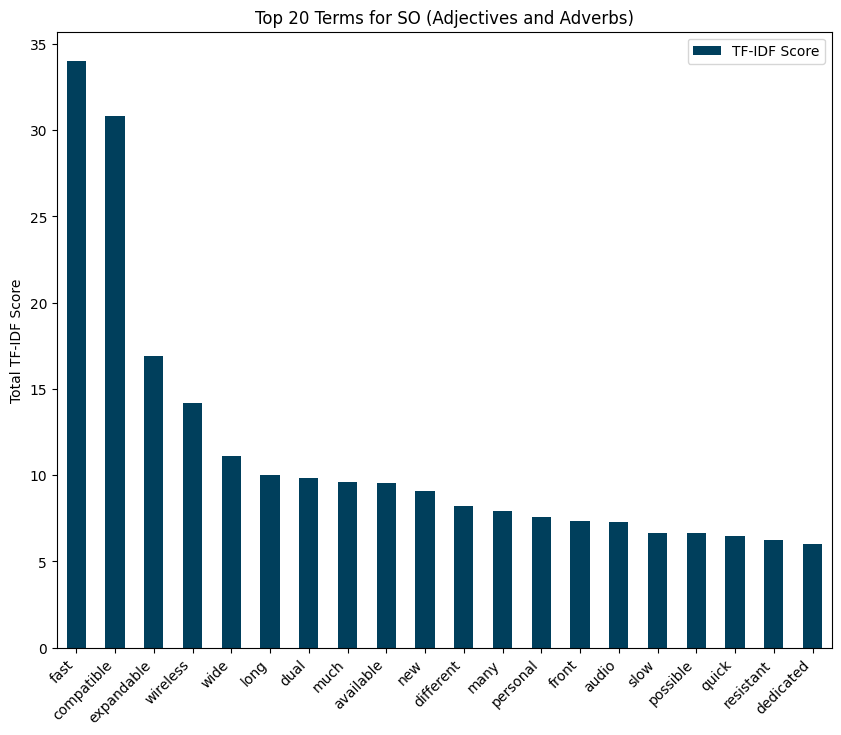

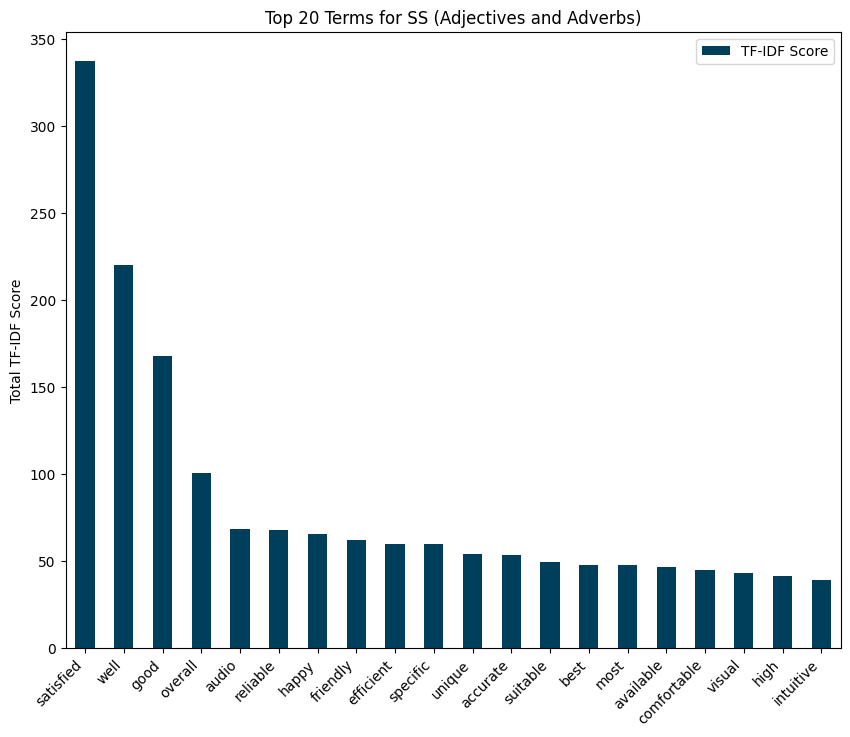

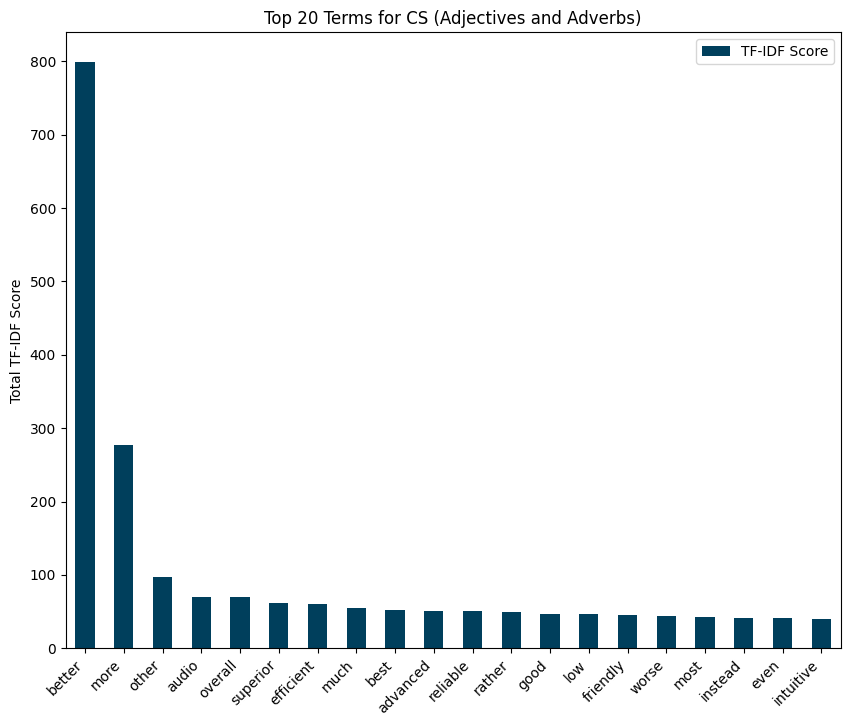

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming merged_df is your DataFrame and is already loaded

# Load spacy model for NLP
nlp = spacy.load("en_core_web_sm")

# Function to process text data to extract only adjectives and adverbs
def process_text(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.pos_ in ['ADJ', 'ADV']])

# Initialize the TF-IDF Vectorizer with unigrams, bigrams, and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Loop through each class in 'Label_Subjectivity_ComparisionForm'
for subjectivity_label in merged_df['Label_Subjectivity_ComparisionForm'].unique():
    filtered_df = merged_df[merged_df['Label_Subjectivity_ComparisionForm'] == subjectivity_label]
    processed_texts = filtered_df['Question'].apply(process_text)
    tfidf_matrix = vectorizer.fit_transform(processed_texts)
    feature_names = vectorizer.get_feature_names_out()

    # Convert TF-IDF matrix to DataFrame
    tfidf_scores_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    total_scores = tfidf_scores_df.sum().sort_values(ascending=False)

    # Select top N terms for visualization
    top_n = 20
    top_terms = total_scores.head(top_n)

    # Plotting the bar graph for the top N terms
    plt.figure(figsize=(10, 8))
    top_terms.plot(kind='bar', color='#003f5c', label='TF-IDF Score')
    plt.title(f'Top {top_n} Terms for {subjectivity_label} (Adjectives and Adverbs)')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Total TF-IDF Score')
    plt.legend()  # This will add the legend to your plot
    plt.savefig(f'Top {top_n} Terms for {subjectivity_label} ADVADJ.tif')
    plt.show()


**Fig 2. Top 20 TF-IDF Scores of Adverbs/Adjectives in FQSD Categorized by Subjectivity Comparison-Form Classes: a) CO b) CS c) SO d) SS**

This code snippet leverages the spaCy library and scikit-learn's TfidfVectorizer to perform a nuanced textual analysis focused on adjectives and adverbs within the Frequently Questioned Smartphone Dataset (FQSD). Specifically, it employs `TfidfVectorizer(ngram_range=(1, 1))` to analyze unigrams—single word units—highlighting the subtle subjective and objective contexts captured through adjectives and adverbs. This refined focus aims to shed light on the linguistic strategies


#######################################################################################################

## Histogram Analysis of TF-IDF Scores for Adjectives and Adverbs Across Subjectivity-ComparisionForm Classes

In our analysis, Figure 3 provides a comparative visualization of TF-IDF scores for adjectives and adverbs across the Comparative Objective (CO), Comparative Subjective (CS), Single Objective (SO), and Single Subjective (SS) classes. This histogram representation offers a deeper insight into the linguistic strategies and vocabulary nuances employed within the Frequently Questioned Smartphone Dataset (FQSD). It underscores the differential use of language across these classes, reflecting the specificity and diversity of terms used in objective comparisons, subjective evaluations, and their singular counterparts. The visualization aims to validate our analytical methodology, demonstrating the clear lexical distinctions and usage patterns that emerge when segmenting the data by these nuanced categories.


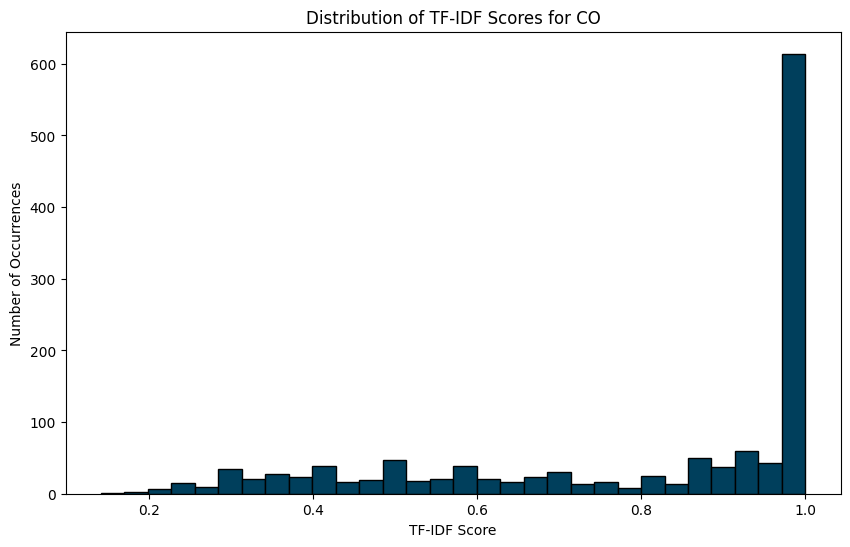

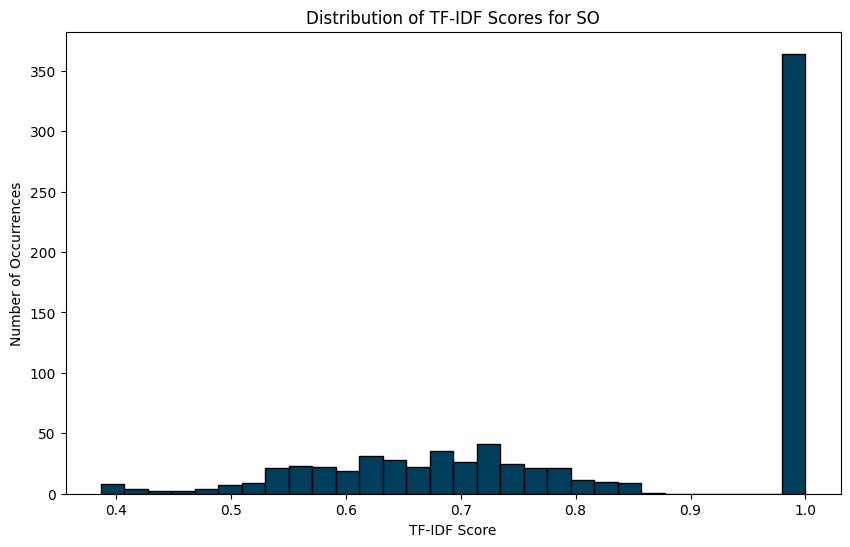

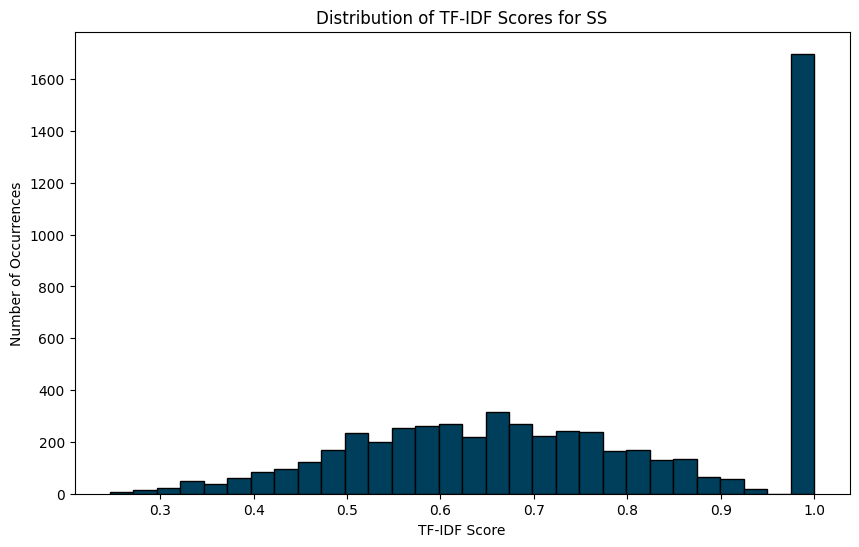

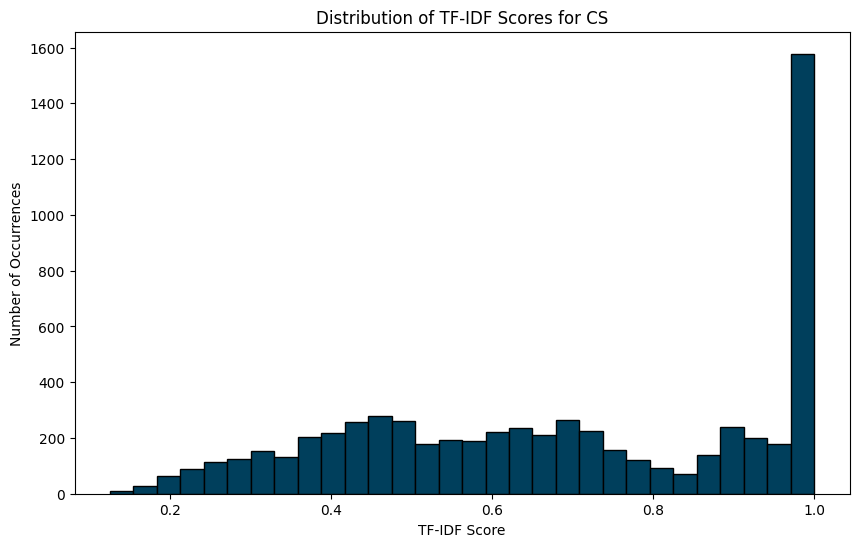

In [13]:
# Loop through each class again for histogram visualization
for subjectivity_label in merged_df['Label_Subjectivity_ComparisionForm'].unique():
    filtered_df = merged_df[merged_df['Label_Subjectivity_ComparisionForm'] == subjectivity_label]
    processed_texts = filtered_df['Question'].apply(process_text)
    tfidf_matrix = vectorizer.fit_transform(processed_texts)

    # Flatten the TF-IDF scores for histogram
    all_scores = tfidf_matrix.toarray().flatten()
    all_scores = all_scores[all_scores > 0]  # Filter out zero scores to focus on non-zero values

    plt.figure(figsize=(10, 6))
    plt.hist(all_scores, bins=30, color='#003f5c', edgecolor='black')
    plt.title(f'Distribution of TF-IDF Scores for {subjectivity_label}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Number of Occurrences')
    plt.savefig(f'Distribution of TF-IDF Scores for {subjectivity_label} ADVADJ.tif')
    plt.show()

**Fig 3. Histograms of TF-IDF Adverbs/Adjectives Scores in FQSD Categorized by Subjectivity Comparison-Form Classes: a) CO b) CS c) SO d) SS**

This code iterates through each class of subjectivity and comparison form, visualizes the distribution of non-zero TF-IDF scores for adjectives and adverbs in the dataset, and generates histograms to illustrate the variance and concentration of TF-IDF scores within each category.


#######################################################################################################

# Text Statistics Calculation

Within this segment of the notebook, we delve into the textual intricacies of each dataset under examination. We implement two essential functions: `count_syllables`, which discerns the number of syllables within a word, reflecting text complexity and readability; and `text_statistics`, which computes a spectrum of textual metrics. These include sentence and word counts, diversity of vocabulary through unique word count, as well as averages of word per sentence, sentence length, word length, and syllables per word—collective measures that shed light on the linguistic fabric of our datasets.

Post function definition, we apply them across datasets outlined in `dataset_paths`. By amalgamating questions into a single text corpus per dataset, we calculate its textual statistics. The computed metrics furnish a comprehensive overview of text structure and complexity, pivotal for grasping question intricacy within our datasets.

This analytical stride is instrumental in unraveling the linguistic characteristics unique to each dataset, thus guiding the tailoring of subsequent analyses and modeling efforts.


In [14]:
#Correct except the last one:
import pandas as pd
import re
import string

# Function to count syllables in a word
def count_syllables(word):
    word = word.lower()
    syllable_count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith("e"):
        syllable_count -= 1
    if word.endswith("le"):
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

# Function to calculate various text statistics
def text_statistics(text):
    sentences = re.split('[.!?]', text)
    sentences = [s.strip() for s in sentences if s]

    words = re.findall(r'\b\w+\b', text.lower())
    unique_words = set(words)

    num_sentences = len(sentences)
    num_words = len(words)
    num_unique_words = len(unique_words)

    avg_words_per_sentence = num_words / num_sentences if num_sentences > 0 else 0
    avg_sentence_length = sum(len(s) for s in sentences) / num_sentences if num_sentences > 0 else 0
    avg_word_length = sum(len(w) for w in words) / num_words if num_words > 0 else 0

    syllables = [count_syllables(word) for word in words]
    avg_syllable_per_word = sum(syllables) / num_words if num_words > 0 else 0

    return {
        'Sentences': num_sentences,
        'All_Words': num_words,
        'Unique_Words': num_unique_words,
        'Avg_Words_Per_Sentence': avg_words_per_sentence,
        'Avg_Sentence_Length': avg_sentence_length,
        'Avg_Word_Length': avg_word_length,
        'Avg_Syllables_Per_Word': avg_syllable_per_word
    }



# Initialize statistics
data_statistics = {
    'Dataset': [],
    'Questions': [],
    'All_Words': [],
    'Unique_Words': [],
    'Avg_Words_Per_Sentence': [],
    'Avg_Sentence_Length': [],
    'Avg_Word_Length': [],
    'Avg_Syllables_Per_Word': []
}

# Process each dataset
for dataset_name, dataset_path in dataset_paths.items():
    df = pd.read_json(dataset_path, lines=True)
    concatenated_text = ' '.join(df['Question'])
    stats = text_statistics(concatenated_text)

    data_statistics['Dataset'].append(dataset_name)
    data_statistics['Questions'].append(len(df))
    data_statistics['All_Words'].append(stats['All_Words'])
    data_statistics['Unique_Words'].append(stats['Unique_Words'])

#data_statistics


In [15]:
print(data_statistics)

{'Dataset': ['FSQD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA'], 'Questions': [10000, 1589, 220, 5192], 'All_Words': [159459, 11839, 2311, 30717], 'Unique_Words': [4736, 830, 389, 2513], 'Avg_Words_Per_Sentence': [], 'Avg_Sentence_Length': [], 'Avg_Word_Length': [], 'Avg_Syllables_Per_Word': []}


# Multi-Sentence Structure Analysis
This code segment identifies multi-sentence structures in each dataset, providing insights into question complexity. By counting sentences in each question, we quantify the prevalence of detailed and intricate queries, crucial for understanding the depth of user inquiries in our study.


In [16]:
import pandas as pd
import re

# Function to check if a text contains multiple sentences
def is_multi_sentence(text):
    # Count the number of sentence-ending punctuation marks
    sentence_endings = re.findall('[.!?]', text)
    return len(sentence_endings) >= 2

# Function to compute text statistics for a batch of text
def text_statistics_batch(text_batch):

    multi_sentence_count = 0

    for question in text_batch:
        if is_multi_sentence(question):
            multi_sentence_count += 1


    return multi_sentence_count


# Initialize statistics
data_statistics2 = {

    'Multi_Sentence_Strings': []
}

# Process each dataset
for dataset_name, dataset_path in dataset_paths.items():
    df = pd.read_json(dataset_path, lines=True)
    stats = text_statistics_batch(df['Question'])


    data_statistics2['Multi_Sentence_Strings'].append(stats)

#data_statistics2


In [17]:
print(data_statistics2)

{'Multi_Sentence_Strings': [742, 16, 1, 4]}


# Visualizing Dataset Statistics

In this section, we create visualizations to illustrate key statistics of our datasets. The goal is to provide a clear, graphical representation of various metrics such as the total number of questions, multi-sentence strings, word counts, and unique word counts across different datasets. These visualizations will help in understanding the scale and lexical diversity of each dataset.

- **Data Preparation**: We start by organizing our collected data statistics into a pandas DataFrame. This DataFrame includes metrics for each dataset: 'FQSD', 'ConvEx-DS', 'Yu et al., 2012', and 'SubjQA'.

- **First Plot - Size and Scale**: The first plot visualizes the total number of questions and the count of multi-sentence strings in each dataset. We use a bar plot to represent the total number of questions and a line plot for multi-sentence strings. This dual representation provides a comprehensive view of the dataset sizes and the prevalence of complex, multi-sentence structures.

- **Second Plot - Lexical Metrics**: The second plot focuses on lexical metrics, showcasing the total word count and unique word count for each dataset. Again, we use a bar plot for the total word count and a line plot for the unique word count. This visualization highlights the lexical richness and variety in each dataset.

For both plots, we adjust the global font scale for better readability and use different colors for clarity. The plots are saved as PNG files and displayed, providing visual aids that accompany our analysis of the datasets' characteristics.


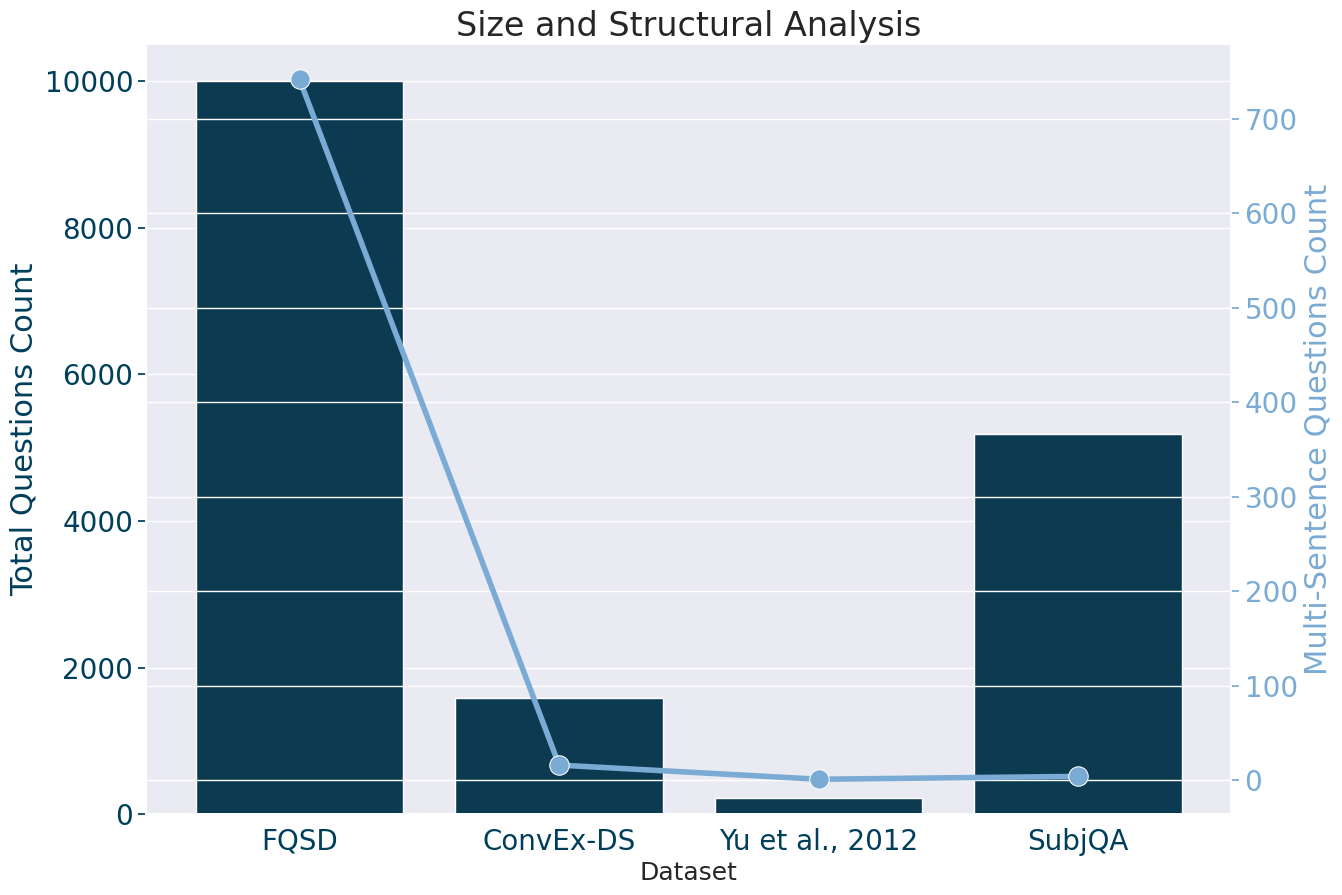

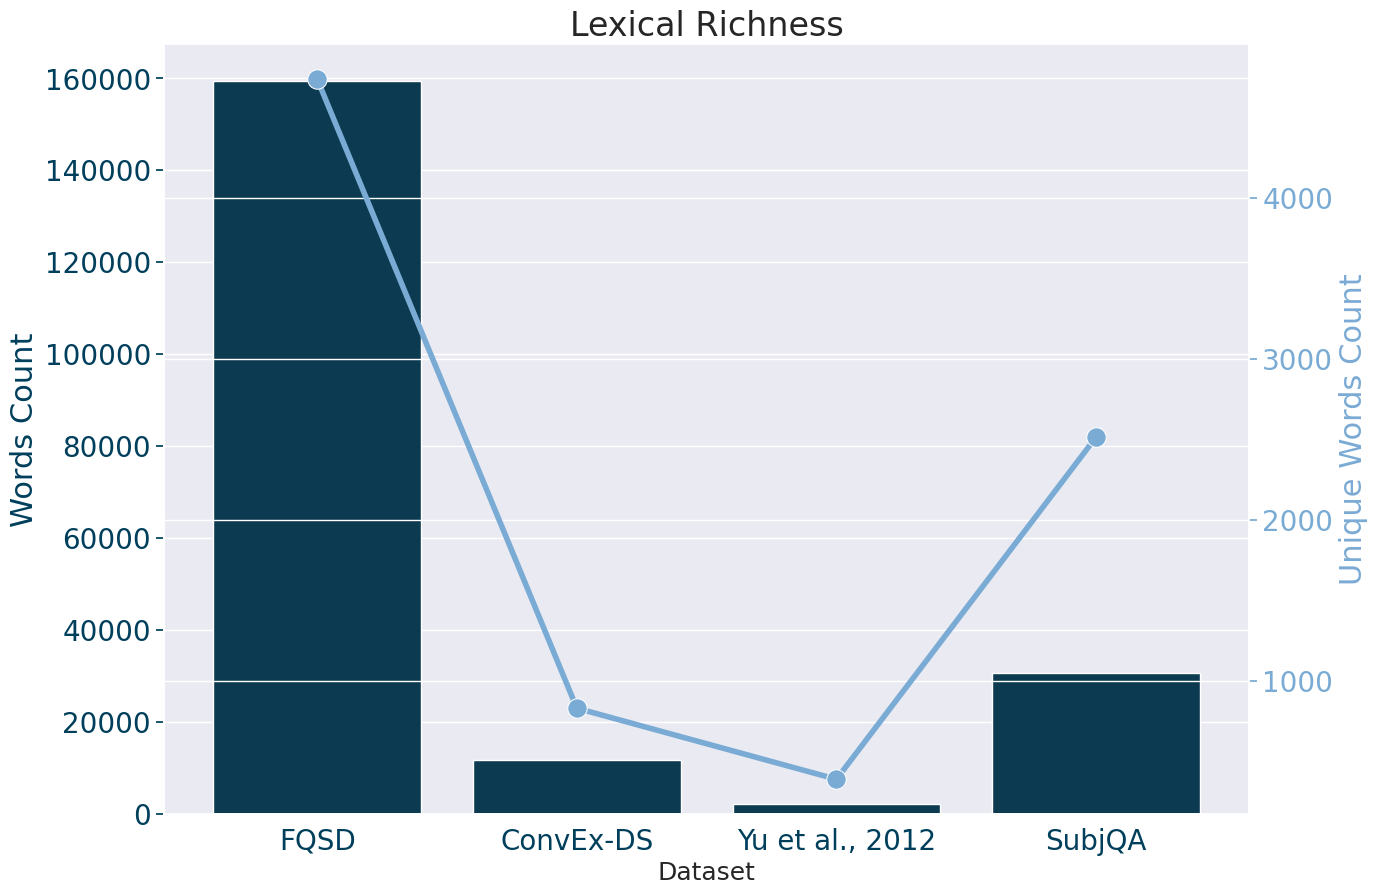

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Dataset': ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA'],
    'Questions': data_statistics['Questions'],
    'All_Words': data_statistics['All_Words'],
    'Unique_Words':  data_statistics['Unique_Words'],
    'Multi_Sentence_Strings':  data_statistics2['Multi_Sentence_Strings'],
}

df = pd.DataFrame(data)

# Adjust global font size
sns.set(font_scale=1.5)

# Dark blue color for bars and a lighter blue for lines
dark_blue = '#003f5c'
light_blue = '#7aabd4'  # A lighter shade for contrast

# Create first plot with dual y-axes for 'Questions' and 'Multi_Sentence_Strings'
plt.figure(figsize=(14, 10))
ax1 = plt.gca()  # get current axis
sns.barplot(x='Dataset', y='Questions', data=df, ax=ax1, color=dark_blue)
ax1.set_ylabel('Total Questions Count', color=dark_blue, fontsize=22)

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Dataset', y='Multi_Sentence_Strings', data=df, ax=ax2, color=light_blue, marker='o', markersize=14, linewidth=4)
ax2.set_ylabel('Multi-Sentence Questions Count', color=light_blue, fontsize=22)

plt.title('Size and Structural Analysis', fontsize=24)
plt.xlabel('Dataset', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20, colors=dark_blue)
ax2.tick_params(axis='both', which='major', labelsize=20, colors=light_blue)
plt.savefig('Fig 4.tif', bbox_inches='tight', pad_inches=0)
plt.show()

# Create second plot with dual y-axes for 'All_Words' and 'Unique_Words'
plt.figure(figsize=(14, 10))
ax1 = plt.gca()  # get current axis
sns.barplot(x='Dataset', y='All_Words', data=df, ax=ax1, color=dark_blue)
ax1.set_ylabel('Words Count', color=dark_blue, fontsize=22)

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Dataset', y='Unique_Words', data=df, ax=ax2, color=light_blue, marker='o', markersize=14, linewidth=4)
ax2.set_ylabel('Unique Words Count', color=light_blue, fontsize=22)

plt.title('Lexical Richness', fontsize=24)
plt.xlabel('Dataset', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20, colors=dark_blue)
ax2.tick_params(axis='both', which='major', labelsize=20, colors=light_blue)
plt.savefig('Fig 5.tif', bbox_inches='tight', pad_inches=0)
plt.show()


**Fig 4: Distribution of Total Question Count and Multi-Sentence Question Count across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Size and Structural Analysis of each dataset**
**************
**Fig 5. Distribution of the Total Word Count and Unique Word Count across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Lexical Richness of each dataset.**

In [19]:
print(data['Questions'])

[10000, 1589, 220, 5192]


#######################################################################################################

# Advanced Text Analysis: Calculating Linguistic Metrics

In this section of the notebook, we delve deeper into the linguistic analysis of our datasets. The objective here is to compute detailed text statistics that provide insights into the complexity and diversity of the language used in the questions.

- **Syllable Counting Function**: We start by defining a function, `count_syllables`, which counts the number of syllables in a word. This function is crucial for assessing the complexity of words in our datasets, as syllable count is often related to word difficulty.

- **Text Statistics Function**: Next, we introduce the `text_statistics` function. This function analyzes a given text and calculates various metrics, including the number of sentences, total and unique word counts, average words per sentence, average sentence length, average word length, and average syllables per word. These metrics provide a comprehensive view of the linguistic characteristics of our datasets, offering insights into sentence structure, lexical diversity, and word complexity.

- **Applying the Functions to Datasets**: We then apply these functions to each of the datasets specified in `dataset_paths`. By processing the text of each dataset, we accumulate a set of statistics that reveal the linguistic nature of the questions. This includes understanding how complex or simple the questions are, how diverse the vocabulary is, and what the typical sentence structure looks like.

- **Compiling Statistics for Analysis**: The results are compiled into a data structure, `data_statistics`, which includes aggregated statistics for each dataset. This structured format allows us to easily visualize and compare these linguistic metrics across different datasets later in the notebook.

By conducting this advanced text analysis, we aim to gain a deeper understanding of the linguistic attributes of the questions in our datasets. This understanding is essential for tailoring our question classification models and for drawing meaningful insights from the data.


In [20]:
#Correct except the last one:
import pandas as pd
import re
import string

# Function to count syllables in a word
def count_syllables(word):
    word = word.lower()
    syllable_count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith("e"):
        syllable_count -= 1
    if word.endswith("le"):
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

# Function to calculate various text statistics
def text_statistics(text):
    sentences = re.split('[.!?]', text)
    sentences = [s.strip() for s in sentences if s]

    words = re.findall(r'\b\w+\b', text.lower())
    unique_words = set(words)

    num_sentences = len(sentences)
    num_words = len(words)
    num_unique_words = len(unique_words)

    avg_words_per_sentence = num_words / num_sentences if num_sentences > 0 else 0
    avg_sentence_length = sum(len(s) for s in sentences) / num_sentences if num_sentences > 0 else 0
    avg_word_length = sum(len(w) for w in words) / num_words if num_words > 0 else 0

    syllables = [count_syllables(word) for word in words]
    avg_syllable_per_word = sum(syllables) / num_words if num_words > 0 else 0

    return {
        'Sentences': num_sentences,
        'All_Words': num_words,
        'Unique_Words': num_unique_words,
        'Avg_Words_Per_Sentence': avg_words_per_sentence,
        'Avg_Sentence_Length': avg_sentence_length,
        'Avg_Word_Length': avg_word_length,
        'Avg_Syllables_Per_Word': avg_syllable_per_word
    }



# Initialize statistics
data_statistics = {
    'Dataset': [],
    'Questions': [],
    'All_Words': [],
    'Unique_Words': [],
    'Avg_Words_Per_Sentence': [],
    'Avg_Sentence_Length': [],
    'Avg_Word_Length': [],
    'Avg_Syllables_Per_Word': []
}

# Process each dataset
for dataset_name, dataset_path in dataset_paths.items():
    df = pd.read_json(dataset_path, lines=True)
    concatenated_text = ' '.join(df['Question'])
    stats = text_statistics(concatenated_text)

    data_statistics['Dataset'].append(dataset_name)
    data_statistics['Questions'].append(len(df))
    data_statistics['All_Words'].append(stats['All_Words'])
    data_statistics['Unique_Words'].append(stats['Unique_Words'])
    data_statistics['Avg_Words_Per_Sentence'].append(stats['Avg_Words_Per_Sentence'])
    data_statistics['Avg_Sentence_Length'].append(stats['Avg_Sentence_Length'])
    data_statistics['Avg_Word_Length'].append(stats['Avg_Word_Length'])
    data_statistics['Avg_Syllables_Per_Word'].append(stats['Avg_Syllables_Per_Word'])

#data_statistics


In [21]:
print(data_statistics)

{'Dataset': ['FSQD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA'], 'Questions': [10000, 1589, 220, 5192], 'All_Words': [159459, 11839, 2311, 30717], 'Unique_Words': [4736, 830, 389, 2513], 'Avg_Words_Per_Sentence': [14.793487336487615, 9.62520325203252, 10.457013574660634, 5.912800769971126], 'Avg_Sentence_Length': [81.79358010947212, 50.28211382113821, 55.14932126696833, 28.287776708373435], 'Avg_Word_Length': [4.567355872042343, 4.3214798547174595, 4.360017308524449, 3.9508741087996873], 'Avg_Syllables_Per_Word': [1.6024746172997448, 1.5084044260494973, 1.4612721765469494, 1.3012663997135137]}


# Visualizing Textual Complexity Across Datasets

In this section, we turn our focus to visualizing the textual complexity of the datasets. This visualization aims to compare various linguistic metrics, such as average words per sentence, average sentence length, average word length, and average syllables per word, across different datasets.

- **Data Preparation for Visualization**: We begin by organizing our textual complexity metrics into a DataFrame. This DataFrame, `df`, includes the calculated averages for each textual complexity metric across datasets: 'FQSD', 'ConvEx-DS', 'Yu et al., 2012', and 'SubjQA'.

- **Melting the DataFrame**: To facilitate visualization, we 'melt' the DataFrame. Melting transforms the DataFrame into a format where each row represents a unique combination of dataset and textual complexity metric, making it ideal for a grouped bar plot.

- **Creating the Bar Plot**: Using Seaborn's `barplot` function, we create a grouped bar plot that displays each metric's average value across the datasets. This plot uses different colors to distinguish between the metrics, providing a clear comparative view of the textual complexity in each dataset.

- **Enhancing Plot Readability**: The plot is customized for clarity and readability. We annotate each bar with its value for easy interpretation, adjust font sizes for the title, labels, ticks, and legend to enhance readability, and use a color palette that is visually appealing and distinct.

- **Saving the Plot**: The final plot is saved as a PNG file. This figure, titled 'Textual Complexity', will be a valuable addition to our article, illustrating the comparative linguistic analysis of the datasets we studied.

By visualizing these metrics, we aim to shed light on the linguistic diversity and complexity inherent in each dataset, which is crucial for understanding the nature of the questions and guiding our analysis.


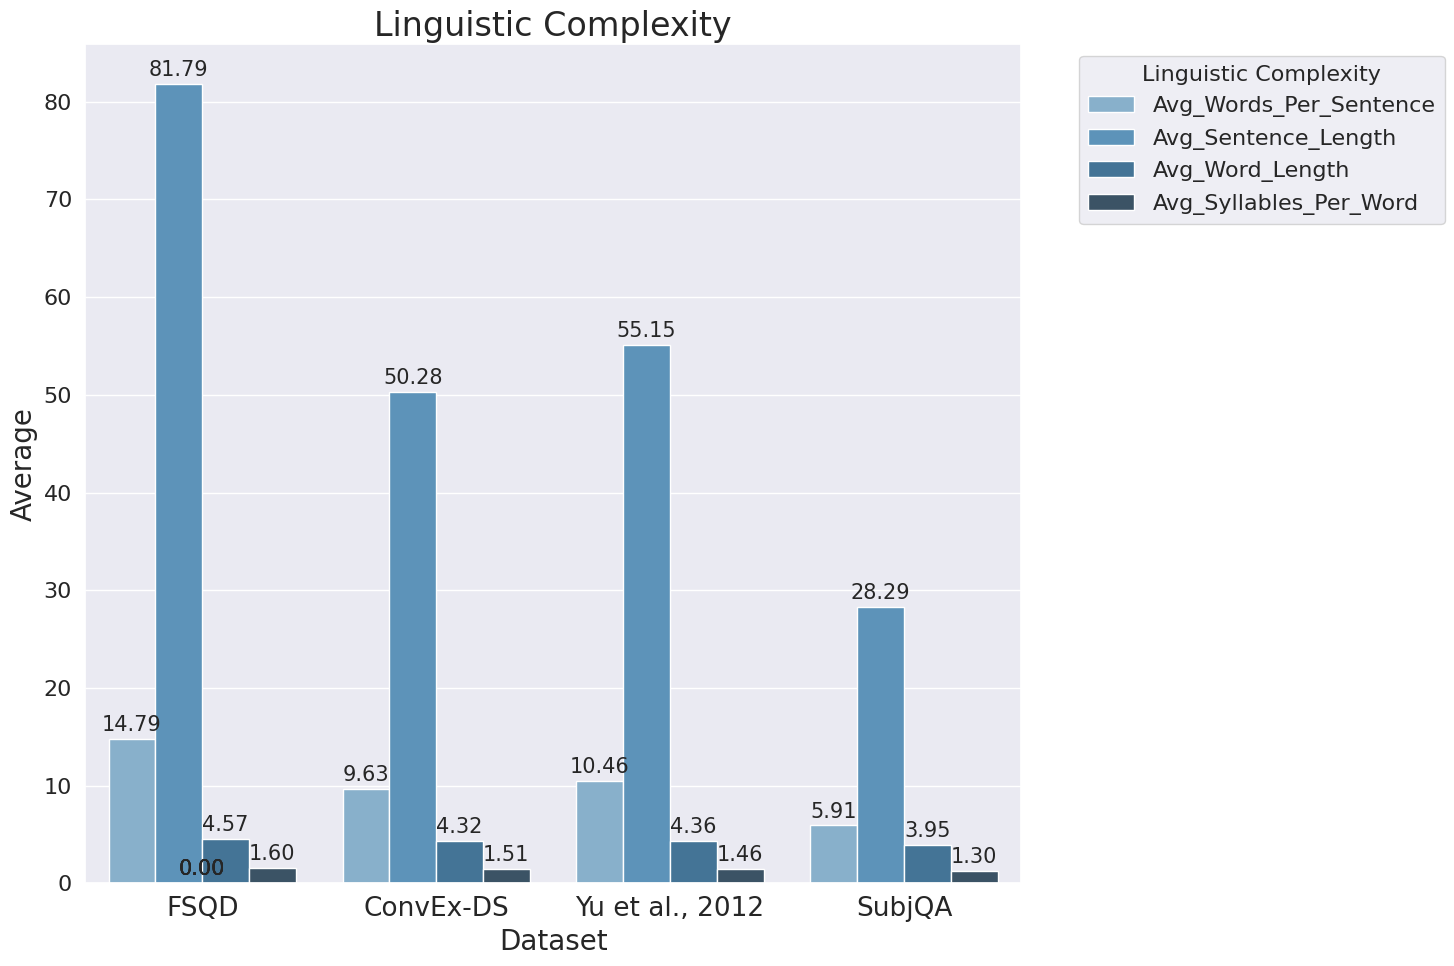

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# data = {
#     'Dataset': ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA'],
#     'Avg_Words_Per_Sentence':  data_statistics['Avg_Words_Per_Sentence'],
#     'Avg_Sentence_Length': data_statistics['Avg_Sentence_Length'],
#     'Avg_Word_Length':  data_statistics['Avg_Word_Length'],
#     'Avg_Syllables_Per_Word': data_statistics['Avg_Syllables_Per_Word'],

# }

df = pd.DataFrame(data_statistics)

# Melt the DataFrame for Textual Complexity
df_melted_textual_complexity = pd.melt(df, id_vars='Dataset',
                                       value_vars=['Avg_Words_Per_Sentence', 'Avg_Sentence_Length',
                                                   'Avg_Word_Length', 'Avg_Syllables_Per_Word'],
                                       var_name='Linguistic_Complexity', value_name='Average')

plt.figure(figsize=(15, 10))
plot = sns.barplot(x='Dataset', y='Average', hue='Linguistic_Complexity', data=df_melted_textual_complexity,
                   palette="Blues_d")  # Using a blue-dominated palette
plt.title('Linguistic Complexity', fontsize=24)
plt.xlabel('Dataset', fontsize=20)
plt.ylabel('Average', fontsize=20)
plt.tick_params(axis='y', labelsize=16)

# Annotating each bar with its value
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=15,
                 xytext=(0, 10),  # Adjusted vertical offset
                 textcoords='offset points')

# Adjust the size of the x-axis tick labels
for item in plot.get_xticklabels():
    item.set_fontsize(19)

# Adjust the size of the legend
legend = plt.legend(title='Linguistic Complexity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_title(), fontsize=16)
plt.setp(legend.get_texts(), fontsize=16)

plt.tight_layout()
plt.savefig('Fig 6.tif', bbox_inches='tight', pad_inches=0)
plt.show()


**Fig 6. Distribution of the Average Words per Sentence, Average Sentence Length, Average Word Length, and Average Syllables per Word across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Linguistic Complexity of each dataset.**

#######################################################################################################

# Analyzing Sentence Structure Complexity

This section of our notebook is dedicated to analyzing the complexity of sentence structures within each dataset. We achieve this by calculating the average parse tree depth for sentences in each dataset, serving as an indicator of syntactic complexity.

- **NLTK Setup**: We begin by importing necessary modules from the Natural Language Toolkit (NLTK) and ensuring that required resources, such as 'punkt' for tokenization and 'averaged_perceptron_tagger' for part-of-speech tagging, are available.

- **Function for Parse Tree Depth Calculation**: `average_parse_tree_depth` is a function we define to calculate the depth of parse trees for sentences. It uses a regular expression-based parser (`RegexpParser`) with the grammar rule "NP: {<DT>?<JJ>*<NN>}", which identifies noun phrases. This grammar is crucial for parsing the sentences to calculate the depth of their parse trees, with depth reflecting the level of syntactic complexity.

- **Applying the Function to Datasets**: We apply the function to each dataset specified in `dataset_paths`. For each dataset, we tokenize the questions into sentences and calculate the average parse tree depth. This gives us insights into the syntactic complexity of the questions.

- **Storing and Comparing Results**: The results are stored in `average_tree_depths`, which allows for a comparison of syntactic complexity across different datasets.

This analytical approach provides critical insights into the structural complexity of the questions, influencing our approach to question classification and comprehension. By understanding the average parse tree depth, we uncover the syntactic variation and intricacy within our datasets.


In [23]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser
from collections import Counter

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to calculate average parse tree depth
def average_parse_tree_depth(sentences):
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = RegexpParser(grammar)
    depths = []

    for sentence in sentences:
        tagged = pos_tag(word_tokenize(sentence))
        tree = cp.parse(tagged)

        depth = 0
        for subtree in tree.subtrees():
            depth = max(depth, subtree.height())

        depths.append(depth)

    return sum(depths) / len(depths) if depths else 0



# Calculate average parse tree depth for each dataset
average_tree_depths = {}

for dataset, path in dataset_paths.items():
    df = pd.read_json(path, lines=True)
    sentences = [sentence for question in df['Question'] for sentence in nltk.sent_tokenize(question)]
    average_depth = average_parse_tree_depth(sentences)
    average_tree_depths[dataset] = average_depth

#average_tree_depths


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
print(average_tree_depths)

{'FSQD': 2.918282682103232, 'ConvEx-DS': 2.802369077306733, 'Yu et al., 2012': 2.772727272727273, 'SubjQA': 2.913570741097209}


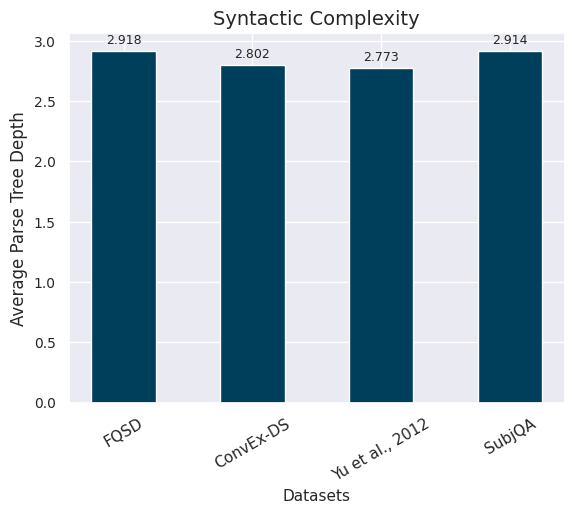

In [25]:
import matplotlib.pyplot as plt

# Assuming 'average_tree_depths' is a predefined dictionary or similar structure with values
# Placeholder for 'average_tree_depths' dictionary, replace with actual data
average_tree_depths = {'FSQD': 2.918282682103232, 'ConvEx-DS': 2.802369077306733, 'Yu et al., 2012': 2.772727272727273, 'SubjQA': 2.913570741097209}

# Average Parse Tree Depth values for the five datasets
dataset_names = ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA']  # Placeholder names, replace with actual names
average_parse_tree_depth_values = list(average_tree_depths.values())

# Create a figure and a set of subplots (in this case, just one)
fig, ax = plt.subplots()

# Create an index for each tick position
ind = range(len(average_parse_tree_depth_values))

# Dark blue color
dark_blue = '#003f5c'

# Plot Average Parse Tree Depth values with dark blue color
bars = ax.bar(ind, average_parse_tree_depth_values, 0.5, color=dark_blue)

# Describe the data
ax.set_xlabel('Datasets', fontsize=11)  # Adjusted fontsize
ax.set_ylabel('Average Parse Tree Depth', fontsize=12)  # Adjusted fontsize
ax.set_title('Syntactic Complexity', fontsize=14)  # Adjusted fontsize
ax.set_xticks(ind)
ax.set_xticklabels(dataset_names, rotation=30, fontsize=11)  # Adjusted fontsize and added rotation
ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis fontsize

# Annotate with the values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9)  # Adjusted fontsize

plt.savefig('Fig 7.tif', bbox_inches='tight', pad_inches=0)
# Show the plot
plt.show()


**Fig 7. Visualizing the Average Parse Tree Depth across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Syntactic Complexity of each dataset.**

#######################################################################################################

# Analyzing Syntactic Relationships: Mean Dependency Distance

In this section, we focus on analyzing the syntactic structure of sentences within our datasets using a metric known as mean dependency distance (MDD). This analysis provides insights into the complexity and intricacy of syntactic relationships in the text.

- **Setting Up spaCy for NLP Analysis**: We begin by loading the English NLP model from spaCy, a powerful library for advanced natural language processing. This model will be used to parse sentences and analyze their dependency structure.

- **Mean Dependency Distance Calculation**: The MDD metric measures the average distance between words and their syntactic heads in a dependency parse tree. It provides an indication of syntactic complexity; longer distances typically imply more complex syntactic structures.


- **Compiling and Comparing Results**: The calculated MDD values for each dataset are stored in `mean_dependency_distances`. This allows us to compare the syntactic complexity across different datasets, providing valuable insights into their linguistic structure.

This mean dependency distance analysis is crucial for understanding the nature of syntactic relationships in our datasets, contributing to a comprehensive linguistic analysis of the questions and aiding in the development of more effective question classification models.


In [26]:
import pandas as pd
import spacy
import math

# Load the English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to calculate the mean dependency distance of a text
def mean_dependency_distance(doc):
    distances = [abs(token.i - token.head.i) for token in doc]
    return sum(distances) / len(distances) if len(distances) > 0 else 0


# Calculate mean dependency distance for each dataset
mean_dependency_distances = {}


for dataset, path in dataset_paths.items():
    df = pd.read_json(path, lines=True)
    concatenated_questions = ' '.join(df['Question']).lower()
    # Process the concatenated questions with spaCy to create a Doc object
    doc = nlp(concatenated_questions)
    # Now you can pass the Doc object to your function
    mdd = mean_dependency_distance(doc)
    mean_dependency_distances[dataset] = mdd

#print(mean_dependency_distances)


In [27]:
print(mean_dependency_distances)

{'FSQD': 3.0717157300367903, 'ConvEx-DS': 2.3351351351351353, 'Yu et al., 2012': 2.342834830144475, 'SubjQA': 1.759494022796775}


# Visualizing Syntactic Structure Complexity: Mean Dependency Distance (MDD)

This part of the notebook is dedicated to graphically representing the mean dependency distance (MDD) for each of our datasets. MDD, as a measure of syntactic structure complexity, provides insights into the intricacy of linguistic constructs within the datasets.

- **Preparing the Bar Plot**: We use the Matplotlib library to create a bar plot that will display the MDD values for each dataset: 'FQSD', 'ConvEx-DS', 'Yu et al., 2012', and 'SubjQA'.

- **Plot Configuration and Styling**: The plot is configured for clarity and ease of interpretation. We set the x-axis to label 'Datasets' and the y-axis to 'Mean Dependency Distance', adjusting the font size for better visibility. The plot title 'Dependency Analysis' succinctly conveys the focus of the visualization.

- **Creating and Customizing Bars**: Each dataset's MDD value is represented by a purple bar, with the height of each bar indicating the mean dependency distance. The bars are arranged to allow easy comparison across datasets.

- **Enhancing Readability with Annotations**: To make the plot more informative, we annotate each bar with its respective MDD value. This precision in annotation provides a clear understanding of the syntactic complexity present in each dataset.

- **Final Adjustments and Saving the Plot**: After fine-tuning the tick labels for readability and applying a slight rotation for better legibility, the plot is saved as a PNG file. This figure, titled 'Dependency Analysis', serves as an important visual aid in our article, illustrating the comparative analysis of syntactic complexity across the datasets.

By creating this visualization, we aim to emphasize the differences in syntactic structure complexity across our datasets, an aspect that is crucial in the context of our linguistic and NLP analysis.


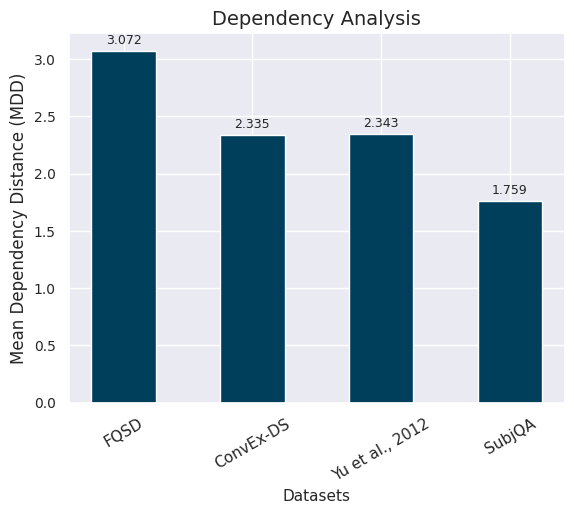

In [28]:
import matplotlib.pyplot as plt

# Assuming 'mean_dependency_distances' is a predefined dictionary or similar structure with values
# Placeholder for 'mean_dependency_distances' dictionary, replace with actual data
mean_dependency_distances = {'FSQD': 3.0717157300367903, 'ConvEx-DS': 2.3351351351351353, 'Yu et al., 2012': 2.342834830144475, 'SubjQA': 1.759494022796775}

# Mean Dependency Distance values for the datasets
dataset_names = ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA']  # Replace these with your actual dataset names
mean_dependency_distance_values = list(mean_dependency_distances.values())

# Create a figure and a set of subplots (in this case, just one)
fig, ax = plt.subplots()

# Create an index for each tick position
ind = range(len(mean_dependency_distance_values))

# Dark blue color
dark_blue = '#003f5c'

# Plot Mean Dependency Distance values with dark blue color
bars = ax.bar(ind, mean_dependency_distance_values, 0.5, color=dark_blue)

# Describe the data
ax.set_xlabel('Datasets', fontsize=11)  # Adjusted fontsize
ax.set_ylabel('Mean Dependency Distance (MDD)', fontsize=12)  # Adjusted fontsize
ax.set_title('Dependency Analysis', fontsize=14)  # Adjusted fontsize
ax.set_xticks(ind)
ax.set_xticklabels(dataset_names, rotation=30, fontsize=11)  # Adjusted fontsize and added rotation
ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis fontsize

# Annotate with the values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9)  # Adjusted fontsize

plt.savefig('Fig 8.tif', bbox_inches='tight', pad_inches=0)
# Show the plot
plt.show()


**Fig 8. Visualizing the Mean Dependency Distance (MDD) across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Dependency Analysis of each dataset.**

#######################################################################################################

# Linguistic Diversity Analysis: TTR, RTTR, and CTTR

This section of the notebook is focused on assessing the linguistic diversity within each dataset using various lexical richness measures: Type-Token Ratio (TTR), Root Type-Token Ratio (RTTR), and Corrected Type-Token Ratio (CTTR).

- **Type-Token Ratio (TTR)**: TTR is a common measure of lexical diversity in a text. It is calculated as the ratio of the number of unique words (types) to the total number of words (tokens). Higher TTR values indicate greater lexical diversity.

- **Root Type-Token Ratio (RTTR) and Corrected Type-Token Ratio (CTTR)**: RTTR and CTTR are variations of TTR that adjust for text length, providing a more normalized measure of lexical diversity. RTTR is the ratio of the number of unique words to the square root of the total number of words, while CTTR further adjusts this ratio for larger text sizes.

- **Calculating TTR, RTTR, and CTTR**: We define functions to calculate these ratios and then apply them to each dataset. Using the spaCy library, we tokenize the concatenated questions from each dataset and compute the TTR, RTTR, and CTTR. These metrics provide insights into the variety and richness of the vocabulary used in the datasets.

- **Analysis Across Datasets**: By calculating these ratios for each dataset, we can compare the lexical richness and diversity across them. This analysis helps in understanding the complexity and variety of language used in the datasets, which is crucial for our study of question classification and understanding.

The results of this analysis, represented by RTTR and CTTR values, provide an in-depth look at the linguistic diversity within our datasets, contributing to a comprehensive understanding of their lexical properties.


In [29]:
import pandas as pd
import spacy
import math

# Function to calculate Type-Token Ratio (TTR)
def type_token_ratio(doc):
    types = set([token.text.lower() for token in doc])
    tokens = len(doc)
    return len(types) / tokens if tokens > 0 else 0

# Function to calculate Root Type-Token Ratio (RTTR)
def root_ttr(doc):
    ttr = type_token_ratio(doc)
    tokens = len(doc)
    return math.sqrt(tokens) / ttr if ttr > 0 else 0

# Function to calculate Corrected Type-Token Ratio (CTTR)
def corrected_ttr(doc):
    ttr = type_token_ratio(doc)
    tokens = len(doc)
    return math.sqrt(2 * tokens) / ttr if ttr > 0 else 0

# Load the English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")



# Lists to store RTTR and CTTR values
rttr_values = []
cttr_values = []

# Calculate RTTR and CTTR for each dataset
for dataset, path in dataset_paths.items():
    df = pd.read_json(path, lines=True)
    concatenated_questions = ' '.join(df['Question']).lower()
    doc = nlp(concatenated_questions)
    rttr = root_ttr(doc)
    cttr = corrected_ttr(doc)
    rttr_values.append(rttr)
    cttr_values.append(cttr)

# Output RTTR and CTTR values
{'RTTR_Values': rttr_values, 'CTTR_Values': cttr_values}


{'RTTR_Values': [15149.689713640153,
  1771.0311095038533,
  324.81903517655803,
  2706.062425747544],
 'CTTR_Values': [21424.896658774076,
  2504.6162144450195,
  459.36348486363187,
  3826.950183120413]}

# Visualizing Lexical Diversity: RTTR and CTTR Comparison

This section of the notebook is dedicated to visually representing the lexical diversity in each of our datasets by comparing Root Type-Token Ratio (RTTR) and Corrected Type-Token Ratio (CTTR) values.

- **Setting Up the Bar Plot**: We use Matplotlib to create a horizontal bar plot. This plot will showcase the RTTR and CTTR values for each dataset: 'FQSD', 'ConvEx-DS', 'Yu et al., 2012', and 'SubjQA'.

- **Configuring the Bar Plot**: Each dataset's RTTR value is represented by a blue bar, and its CTTR value is represented by a green bar. The RTTR bars are positioned first, followed by the CTTR bars. This overlapping layout allows for a direct comparison between the two measures of lexical diversity for each dataset.

- **Customizing Plot Appearance**: The plot includes labels for the x-axis ('Values') and the title ('Lexical Diversity'). We also adjust the font sizes for readability, ensuring that the dataset names and value labels are easily legible.

- **Legend and Annotations**: A legend is added to differentiate between the RTTR and CTTR values, with a smaller font size for neat integration into the plot.

- **Saving the Plot**: The final plot is saved as a PNG file, titled 'Lexical Diversity'. This visualization serves as an informative tool to compare the lexical richness of each dataset, providing a visual summary of the results from our previous analysis.

By creating this visualization, we aim to highlight the differences in lexical diversity across the datasets, which is a key factor in understanding their linguistic characteristics and informing our approach to question classification.


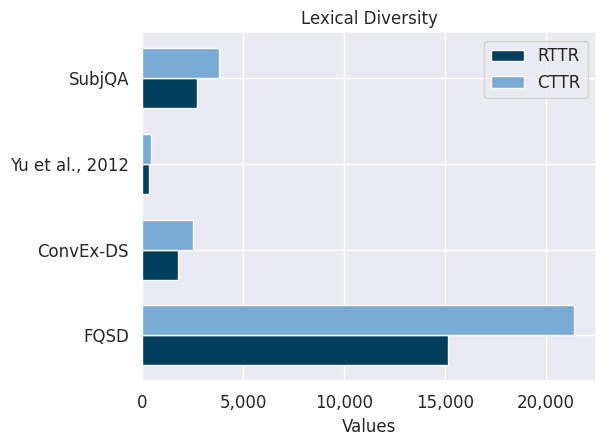

In [30]:
import matplotlib.pyplot as plt

dataset_names = ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA']

# Create a figure and a set of subplots (in this case, just one)
fig, ax = plt.subplots()

# Create an index for each tick position
ind = range(len(dataset_names))

# Define colors
dark_blue = '#003f5c'
light_blue = '#7aabd4'

# Plot RTTR values
ax.barh(ind, rttr_values, 0.35, label='RTTR', color=dark_blue)

# Plot CTTR values
ax.barh([i + 0.35 for i in ind], cttr_values, 0.35, label='CTTR', color=light_blue)

# Set the x-axis labels to show smaller values
max_value = int(max(max(rttr_values), max(cttr_values)))
ax.set_xticks(range(0, max_value + 1, 5000))
ax.set_xticklabels(['{:,}'.format(x) for x in range(0, max_value + 1, 5000)], fontsize=12)

# Set the rest of the labels and title
ax.set_xlabel('Values', fontsize=12)
ax.set_title('Lexical Diversity', fontsize=12)
ax.set_yticks([i + 0.35 / 2 for i in ind])  # Center the y-tick labels between the bars
ax.set_yticklabels(dataset_names, fontsize=12)
ax.legend(fontsize=12)

# Fixing the layout
plt.tight_layout()

# Save and show the plot
plt.savefig('Fig 9.tif', bbox_inches='tight', pad_inches=0)
plt.show()


**Fig 9. Visualizing the Root Type-Token Ratio (RTTR) and the Corrected Type-Token Ratio (CTTR) across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Lexical Diversity of each dataset.**

#######################################################################################################

# Analyzing Text Sparsity Across Datasets
This section of the notebook focuses on calculating the sparsity degree of text within various datasets. The sparsity_degree function plays a pivotal role in this analysis, as it evaluates the diversity of the vocabulary used across the texts. It achieves this by tokenizing the input texts to count unique words and aggregating these counts to form a comprehensive set representing the dataset's entire vocabulary. The sparsity degree itself is derived from the ratio of unique word occurrences to the total possible occurrences, providing a measure of how varied the vocabulary is across the dataset. A higher sparsity degree indicates a more diverse vocabulary, which can influence the complexity and the approaches needed for effective model training.


In [31]:
import pandas as pd
from math import log

# def sparsity_degree(text):
#     tokens = text.split()
#     N = len(tokens)
#     V = len(set(tokens))
#     return V / N if N > 0 else 0

import pandas as pd

# Let's redefine the sparsity_degree function according to the formula provided in the article
def sparsity_degree(questions):
    # Create a set to hold all the unique words
    vocabulary = set()
    # This will store the count of unique words per question
    distinct_word_counts = []

    # Iterate over each question in the dataset
    for question in questions:
        # Tokenize the question by spaces (or use a more sophisticated tokenizer if needed)
        words = question.lower().split()
        # Get the set of unique words in this question
        unique_words = set(words)
        # Add the count of unique words in this question to the list
        distinct_word_counts.append(len(unique_words))
        # Update the vocabulary set with the unique words from this question
        vocabulary.update(unique_words)

    # Calculate the total vocabulary size
    vocabulary_size = len(vocabulary)
    # Calculate the total number of questions
    total_questions = len(questions)

    # Apply the sparsity degree formula as provided in the article
    sparsity_degree_value = 1 - (sum(distinct_word_counts) / (total_questions * vocabulary_size))
    return sparsity_degree_value





# Metrics for each dataset
metrics = {}

# Calculate metrics for each dataset
for dataset, path in dataset_paths.items():
    df = pd.read_json(path, lines=True)
    concatenated_questions = ' '.join(df['Question']).lower()
    sparsity_degree_metric = sparsity_degree(concatenated_questions)
    #sttr_metric = sttr(concatenated_questions)
    metrics[dataset] = {'Sparsity Degree': sparsity_degree_metric}

#metrics
sparsity_degrees2 = [details['Sparsity Degree'] for details in metrics.values()]

print(sparsity_degrees2)
#print(metrics)

[0.9874554941960036, 0.9856697100532668, 0.9818322598810404, 0.9832499957696668]


# Visualizing Dataset Diversity and Scale

Following the calculation of text sparsity, this section leverages matplotlib and seaborn to visually compare the sparsity degrees and sizes of different datasets. By plotting the sparsity degree of each dataset alongside its question count, we obtain a dual-perspective analysis: the bar plot reveals the extent of vocabulary diversity within each dataset, while the line plot on a secondary y-axis shows the scale of the dataset in terms of the number of questions. This visualization not only highlights the variance in vocabulary richness across datasets but also contextualizes each dataset's size, offering valuable insights into the potential challenges and considerations when training NLP models on these diverse data sources.




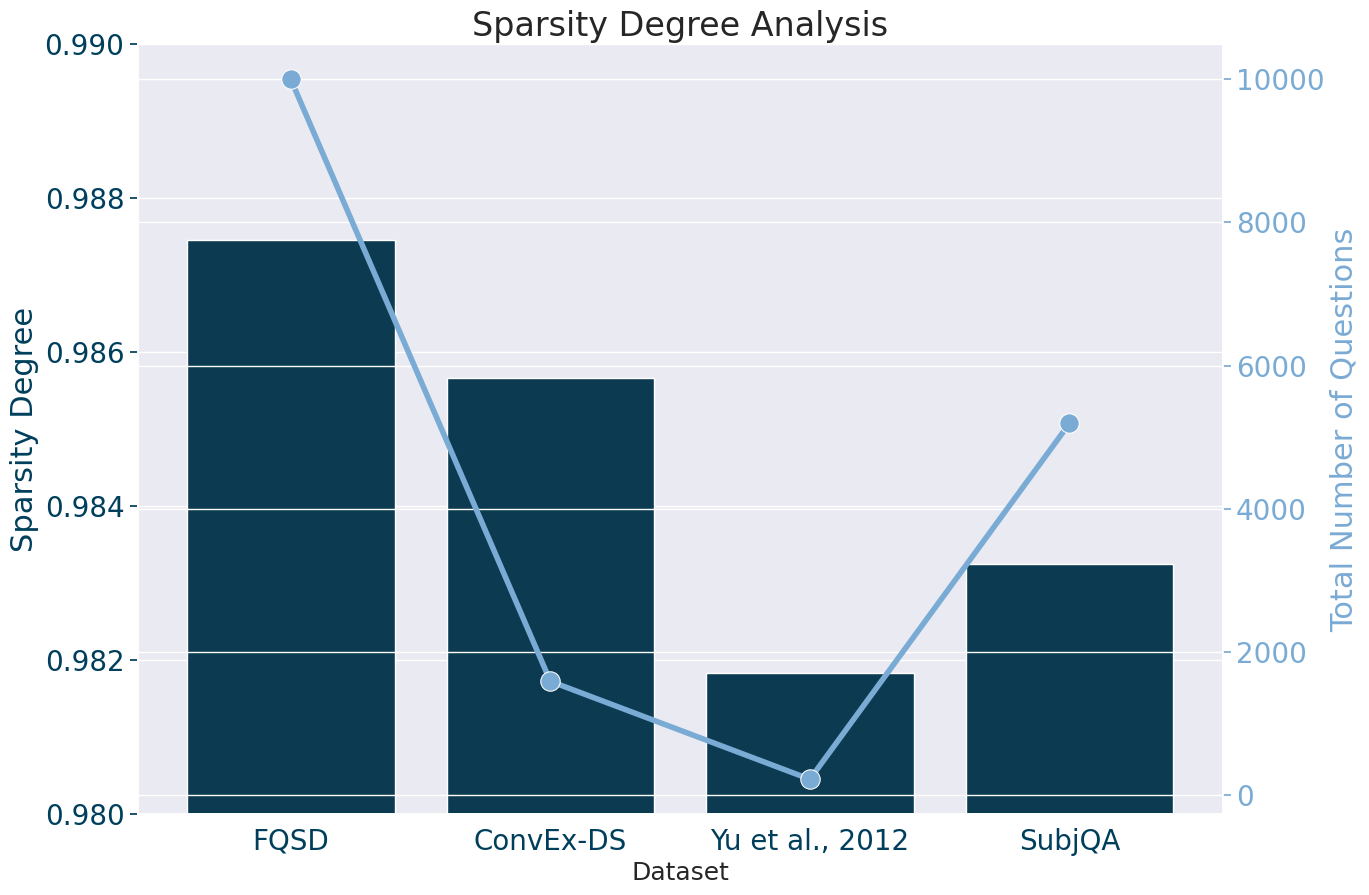

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for Sparsity Degree and Question Counts
data_sparsity = {
    'Dataset': ['FQSD', 'ConvEx-DS', 'Yu et al., 2012', 'SubjQA'],
    'Sparsity_Degree': [0.9874554941960036, 0.9856697100532668, 0.9818322598810404, 0.9832499957696668],
    'Question_Counts': [10000, 1589, 220, 5192],
}

df_sparsity = pd.DataFrame(data_sparsity)

# Adjust global font size
sns.set(font_scale=1.5)

# Dark blue color for bars and a lighter blue for lines
dark_blue = '#003f5c'
light_blue = '#7aabd4'  # A lighter shade for contrast

# Create plot with dual y-axes for 'Sparsity_Degree' and 'Question_Counts'
plt.figure(figsize=(14, 10))
ax1 = plt.gca()  # get current axis
barplot = sns.barplot(x='Dataset', y='Sparsity_Degree', data=df_sparsity, ax=ax1, color=dark_blue)
ax1.set_ylabel('Sparsity Degree', color=dark_blue, fontsize=22)
ax1.set_ylim(0.98, 0.99)  # Restricting y-axis range for sparsity degree

# Create a secondary y-axis
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Dataset', y='Question_Counts', data=df_sparsity, ax=ax2, color=light_blue, marker='o', markersize=14, linewidth=4)
ax2.set_ylabel('Total Number of Questions', color=light_blue, fontsize=22)

plt.title('Sparsity Degree Analysis', fontsize=24)
plt.xlabel('Dataset', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20, colors=dark_blue)
ax2.tick_params(axis='both', which='major', labelsize=20, colors=light_blue)
plt.savefig('Fig 10.tif', bbox_inches='tight', pad_inches=0)
plt.show()


**Fig 10. Visualizing the Sparsity Degree across the FQSD, ConvEx-DS, Yu et al., 2012, and SubjQA datasets, showcasing the Data Sparsity of each dataset.**

## Concluding Remarks

The FQSD, with its rich annotations and granular classifications, paves the way for deeper research into question subjectivity. Its layered approach, encompassing a primary task and detailed subtasks, promises to elevate the field of ASQA systems.


## References:


1.	Yu J, Zha ZJ, Chua TS. Answering opinion questions on products by exploiting hierarchical organization of consumer reviews. In: Proceedings of the 2012 Joint Conference on Empirical Methods in Natural Language Processing and Computational Natural Language Learning; 2012. p. 391-401.
2.	Bjerva J, Bhutani N, Golshan B, Tan WC, Augenstein I. SubjQA: A Dataset for Subjectivity and Review Comprehension. In: Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP); 2020. p. 5480-5494.
3.	Hernandez-Bocanegra DC, Ziegler J. ConvEx-DS: A dataset for conversational explanations in recommender systems. In: Interfaces and Human Decision Making for Recommender Systems 2021: Proceedings of the 8th Joint Workshop on Interfaces and Human Decision Making for Recommender Systems; 2021. p. 3-20.
